<a href="https://colab.research.google.com/github/RogerOliveiraRS/Telecom_X-DataScience-Churn-Prediction/blob/main/Challenge__Telecom_X_Finalizado_Machine_Learning_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  **Telecom X –  Prevendo Churn com uso de Machine Learning**

#### 📣 **História do Desafio**

Parabéns! 🎉 Você foi promovido após seu excelente desempenho na análise exploratória da evasão de clientes na Telecom X. Sua dedicação, clareza na comunicação dos dados e visão estratégica fizeram a diferença.

Agora, você foi convidado a integrar oficialmente a equipe de **Machine Learning** da empresa!

---

#### 🎯 **Missão**

Sua nova missão é desenvolver **modelos preditivos** capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

---

#### 🧠 **Objetivos do Desafio**

- Preparar os dados para a modelagem (tratamento, encoding, normalização).
- Realizar análise de correlação e seleção de variáveis.
- Treinar **dois ou mais modelos de classificação**.
- Avaliar o desempenho dos modelos com métricas.
- Interpretar os resultados, incluindo a **importância das variáveis**.
- Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

---

#### 🧰 **O que você vai praticar**

✅ Pré-processamento de dados para Machine Learning
✅ Construção e avaliação de modelos preditivos
✅ Interpretação dos resultados e entrega de insights
✅ Comunicação técnica com foco estratégico

---

#### 🚀 **Você agora é: Analista de Machine Learning Júnior**

A Telecom X está confiando na sua entrega para dar os próximos passos em direção a uma **solução de inteligência preditiva** eficaz. Boa sorte!

# Códigos executados

##Aquisição, limpeza e tratamento dos dados

###Importando bibliotecas

In [1]:
import pandas as pd
import json

In [2]:
import warnings
warnings.filterwarnings("ignore")

###Importando os dados

In [3]:

dados = pd.read_json('/content/TelecomX_Data.json')
dados.info()
dados.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###Normalização das colunas aninhadas retirando a coluna  'customerID'

In [4]:
# Normalização das colunas aninhadas
df = pd.concat([
    dados[['customerID', 'Churn']],
    pd.json_normalize(dados['customer'], sep='_'),
    pd.json_normalize(dados['phone'], sep='_'),
    pd.json_normalize(dados['internet'], sep='_'),
    pd.json_normalize(dados['account'], sep='_')
], axis=1)

# Verificando estrutura após expansão
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###Eliminando linhas duplicadas

In [5]:
df.duplicated(subset=['customerID'])
df = df.drop_duplicates(subset=['customerID'], keep='first')
print("Numero de linhas apos remoção das duplicadas:", len(df))


Numero de linhas apos remoção das duplicadas: 7267


###Convertendo 'Charges_Total' para tipo numérico

In [6]:
#  Converte 'Charges_Total' para tipo numérico
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

#  Verifica se houve conversão com valores nulos
print("Valores nulos em Charges_Total após conversão:", df['Charges_Total'].isnull().sum())


Valores nulos em Charges_Total após conversão: 11


In [7]:
df = df[df['Charges_Total'].notnull()]
print("Valores nulos em Charges_Total após conversão:", df['Charges_Total'].isnull().sum())


Valores nulos em Charges_Total após conversão: 0


###Retirando a coluna 'customerID'

In [8]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


###Identificando  e Removendo Valores Nulos

In [9]:
df.isnull().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


###Criando mais uma coluna com o gasto médio por mês ('AvgCharge')

In [10]:
df['AvgCharge'] = df['Charges_Total'] / df['tenure']
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,AvgCharge
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,65.922222
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,60.266667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,70.212500
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,95.219231
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,89.133333


###Verificando se há elementos NaN

In [11]:
print(df.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
AvgCharge           0
dtype: int64


In [12]:
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,AvgCharge
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,65.922222
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,60.266667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,70.212500
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,95.219231
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,89.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,57.146154
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,85.168182
7264,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,46.375000
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,69.069403


###Dicionário das variáveis:

In [13]:
# customerID: número de identificação único de cada cliente
# Churn: se o cliente deixou ou não a empresa
# gender: gênero (masculino e feminino)
# SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
# Partner: se o cliente possui ou não um parceiro ou parceira
# Dependents: se o cliente possui ou não dependentes
# tenure: meses de contrato do cliente
# PhoneService: assinatura de serviço telefônico
# MultipleLines: assisnatura de mais de uma linha de telefone
# InternetService: assinatura de um provedor internet
# OnlineSecurity: assinatura adicional de segurança online
# OnlineBackup: assinatura adicional de backup online
# DeviceProtection: assinatura adicional de proteção no dispositivo
# TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
# StreamingTV: assinatura de TV a cabo
# StreamingMovies: assinatura de streaming de filmes
# Contract: tipo de contrato
# PaperlessBilling: se o cliente prefere receber online a fatura
# PaymentMethod: forma de pagamento
# Charges.Monthly: total de todos os serviços do cliente por mês
# Charges.Total: total gasto pelo cliente
# AvgCharge: média dos gastos do cliente por contrato

#EDA — Análise Exploratória de Dados

##Distribuição Geral do Churn

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
print(df['Churn'].value_counts(dropna=False))


Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64


In [16]:
df = df[df['Churn'].isin(['Yes', 'No'])]


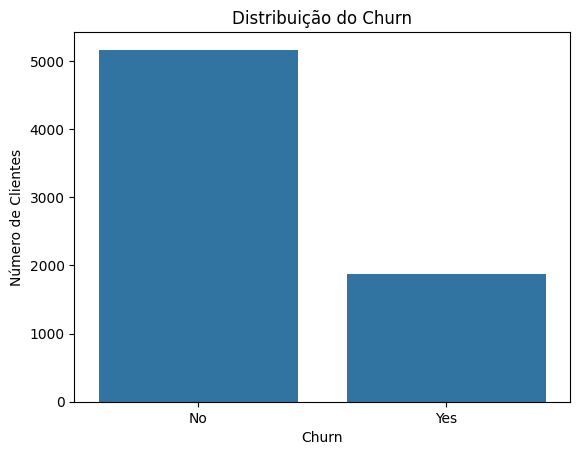

In [17]:
#  Distribuição do churn
sns.countplot(x='Churn', data=df)
plt.title('Distribuição do Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


##Churn por tipo de contrato

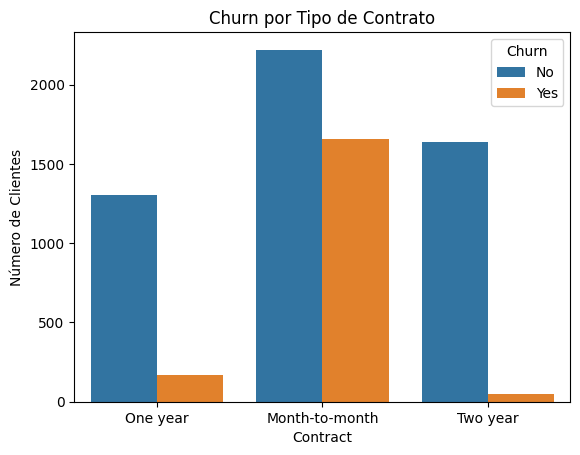

In [18]:
#  Churn por tipo de contrato
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


##Churn por forma de pagamento

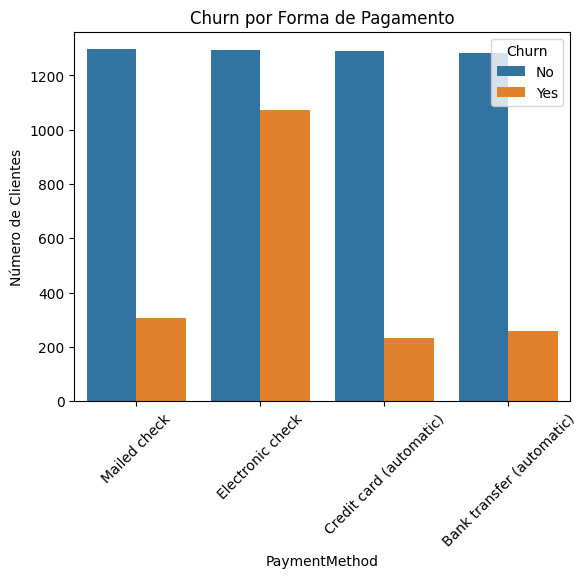

In [19]:
# Churn por forma de pagamento
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn por Forma de Pagamento')
plt.xticks(rotation=45)
plt.ylabel('Número de Clientes')
plt.show()


##Churn por faixa de idade (SeniorCitizen)

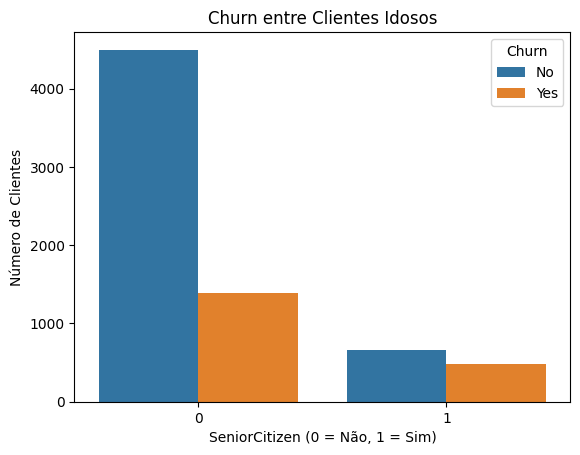

In [20]:
# Churn por faixa de idade (SeniorCitizen)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn entre Clientes Idosos')
plt.xlabel('SeniorCitizen (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()


##Churn por faixa de idade (SeniorCitizen) comparativo com não senior

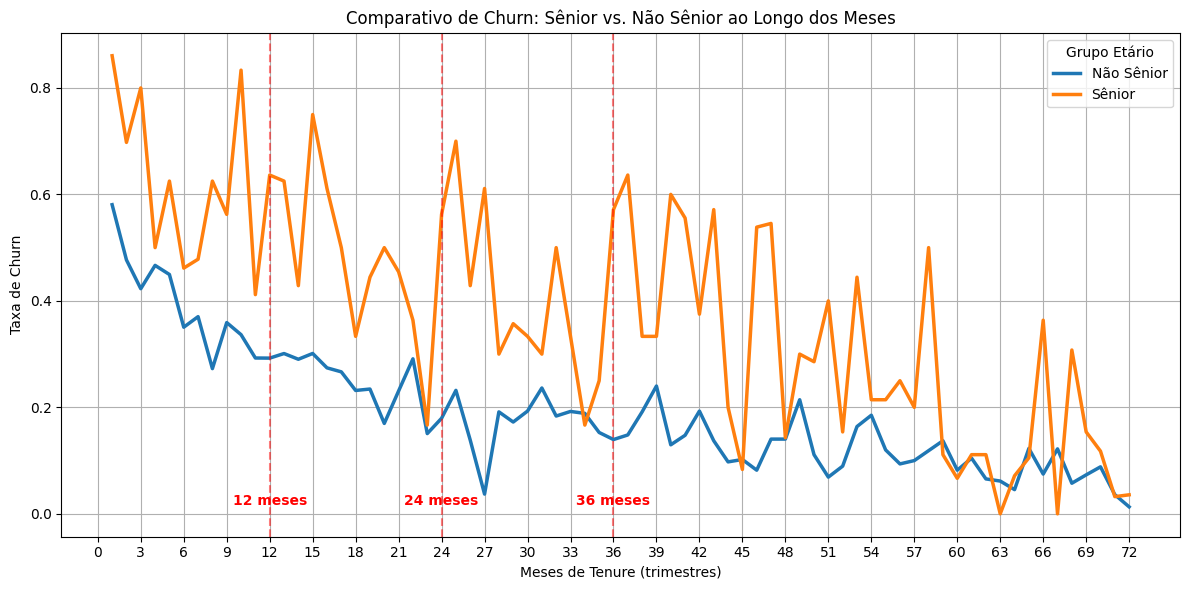

In [21]:

df['Mes'] = df['tenure']  # tenure já representa meses
df['Grupo'] = df['SeniorCitizen'].apply(lambda x: 'Sênior' if x == 1 else 'Não Sênior')

# Agrupamento mensal
churn_mensal = df.groupby(['Mes', 'Grupo'])['Churn'].value_counts().unstack().fillna(0)
churn_mensal['TaxaChurn'] = churn_mensal['Yes'] / (churn_mensal['Yes'] + churn_mensal['No'])
churn_mensal = churn_mensal.reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=churn_mensal, x='Mes', y='TaxaChurn', hue='Grupo', linewidth=2.5)

#  Destaques apenas nos meses 12, 24 e 36
for marco in [12, 24, 36]:
    plt.axvline(x=marco, color='red', linestyle='--', alpha=0.5)
    plt.text(marco, 0.01, f'{marco} meses', color='red',
             rotation=0, fontsize=10, ha='center', va='bottom', fontweight='bold')

# Estética do eixo X
plt.xticks(ticks=range(0, churn_mensal['Mes'].max()+1, 3))  # intervalo de 3 meses = trimestral
plt.xlabel('Meses de Tenure (trimestres)')
plt.ylabel('Taxa de Churn')
plt.title('Comparativo de Churn: Sênior vs. Não Sênior ao Longo dos Meses')
plt.grid(True)
plt.legend(title='Grupo Etário')
plt.tight_layout()

plt.show()



##Churn por tempo de permanência (tenure)

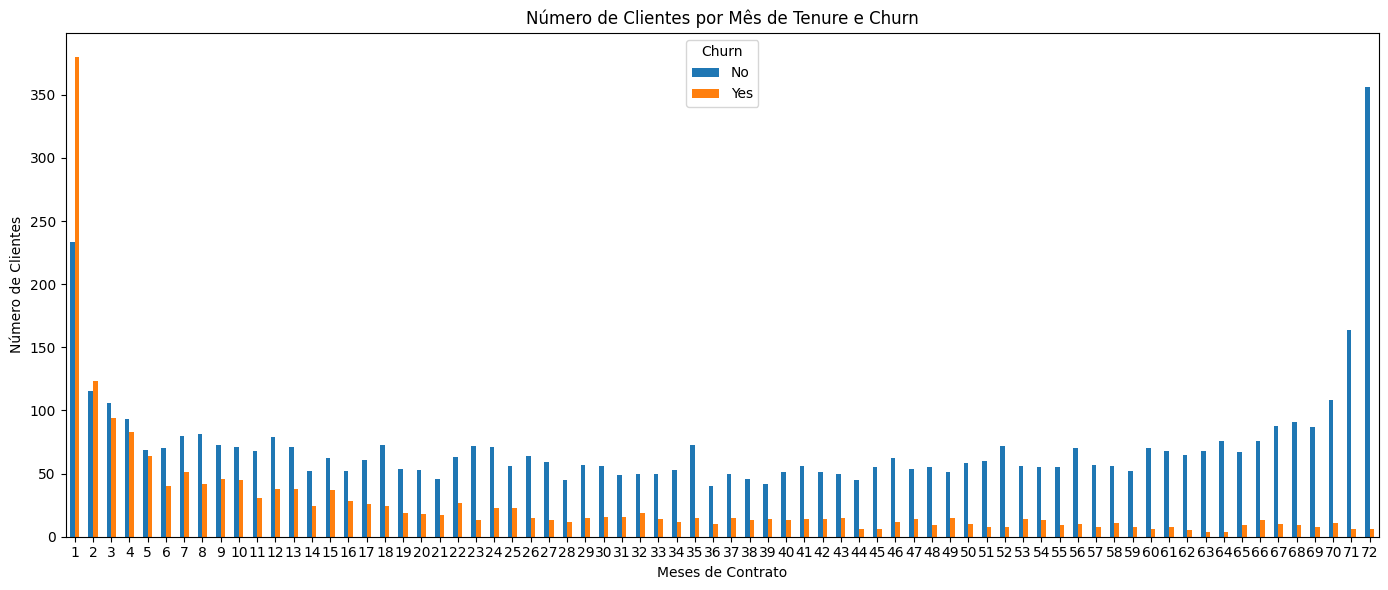

In [22]:
# Agrupa os dados por mês de tenure e Churn
tenure_churn_counts = df.groupby(['tenure', 'Churn']).size().reset_index(name='count')

# Converte os dados em formato de pivot (colunas por churn)
tenure_pivot = tenure_churn_counts.pivot(index='tenure', columns='Churn', values='count').fillna(0)

# Cria gráfico de barras com colunas por mês
tenure_pivot.plot(kind='bar', stacked=False, figsize=(14,6))
plt.title('Número de Clientes por Mês de Tenure e Churn')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



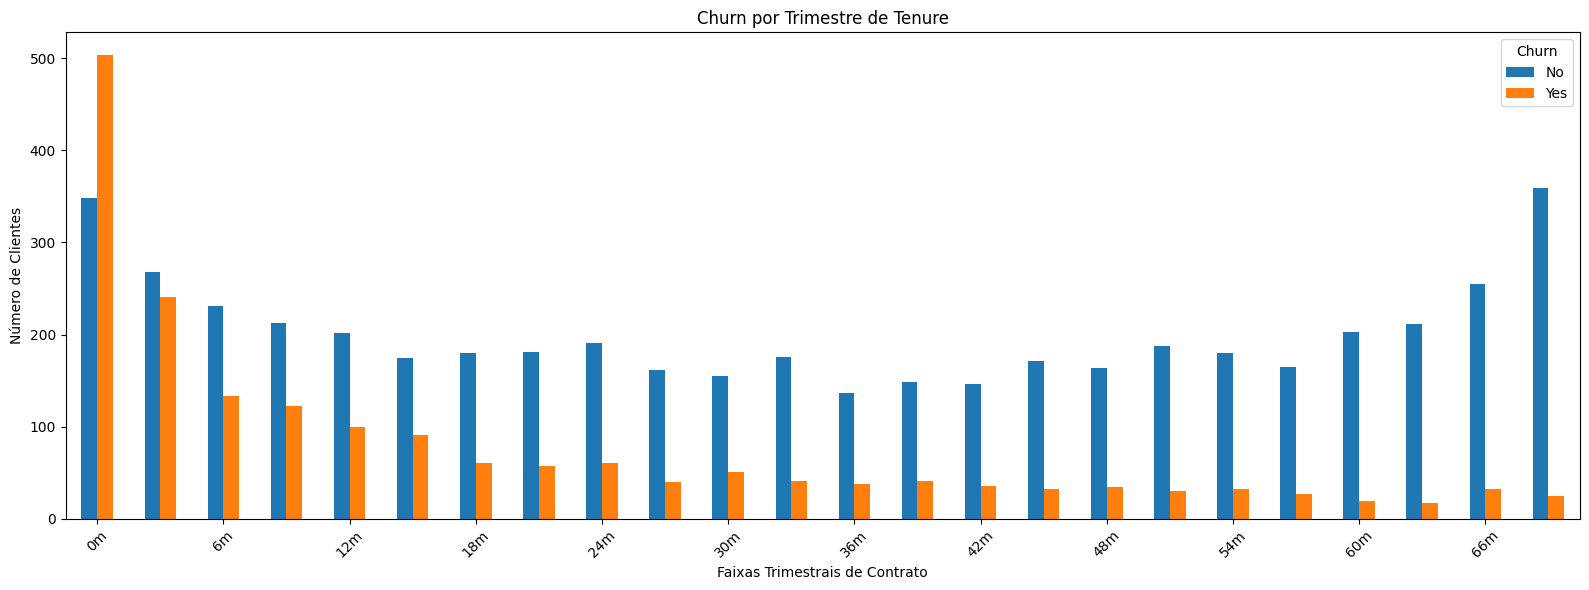

In [23]:
import numpy as np

# Cria faixas de 3 meses
df['tenure_bin_trim'] = pd.cut(df['tenure'], bins=np.arange(0, df['tenure'].max() + 3, 3), right=False)

# Agrupa por faixa e churn
tenure_trim_churn = df.groupby(['tenure_bin_trim', 'Churn']).size().reset_index(name='count')

# Pivot: colunas por churn
tenure_trim_pivot = tenure_trim_churn.pivot(index='tenure_bin_trim', columns='Churn', values='count').fillna(0)

# Cria gráfico
ax = tenure_trim_pivot.plot(kind='bar', stacked=False, figsize=(16, 6))
plt.title('Churn por Trimestre de Tenure')
plt.xlabel('Faixas Trimestrais de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.xticks(rotation=45)

# Ajusta ticks: mostra só os trimestres que fecham semestres (6, 12, 18, etc.)
tick_positions = []
tick_labels = []
for i, bin_label in enumerate(tenure_trim_pivot.index):
    # Extrai valor inicial do intervalo, tipo "Interval(0, 3)"
    start = int(bin_label.left)
    if start % 6 == 0:
        tick_positions.append(i)
        tick_labels.append(f'{start}m')  # exemplo: '6m', '12m'

plt.xticks(ticks=tick_positions, labels=tick_labels)

plt.tight_layout()
plt.show()


##Churn vs. Serviços adicionais contratados

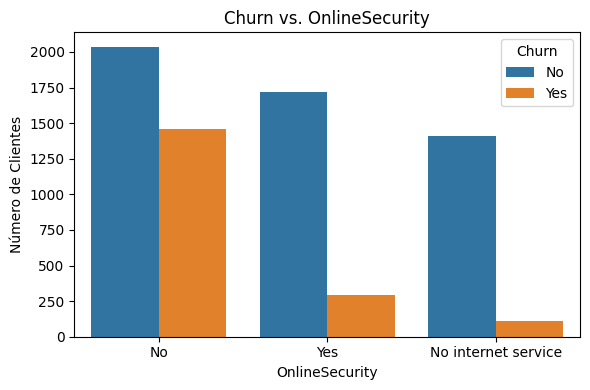

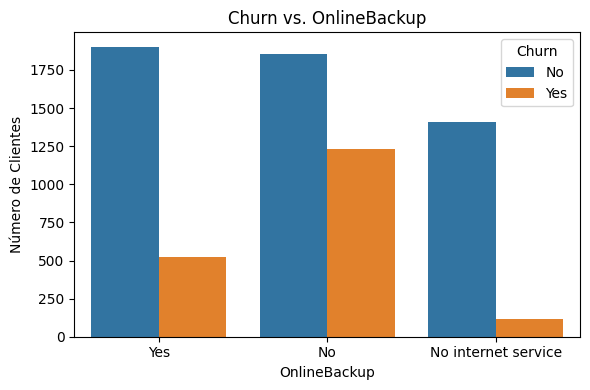

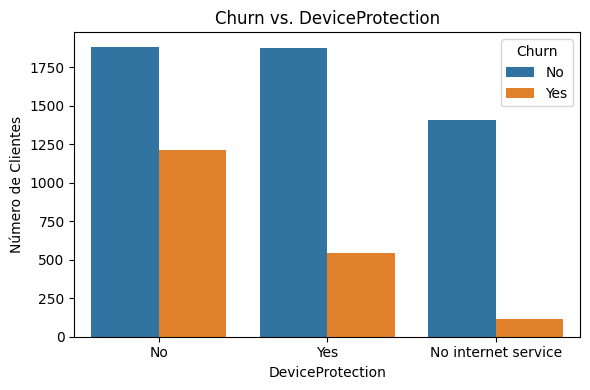

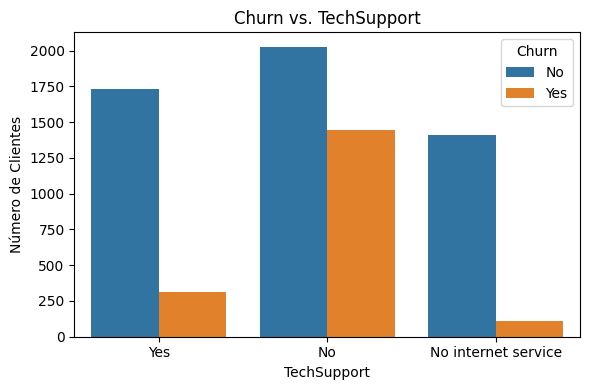

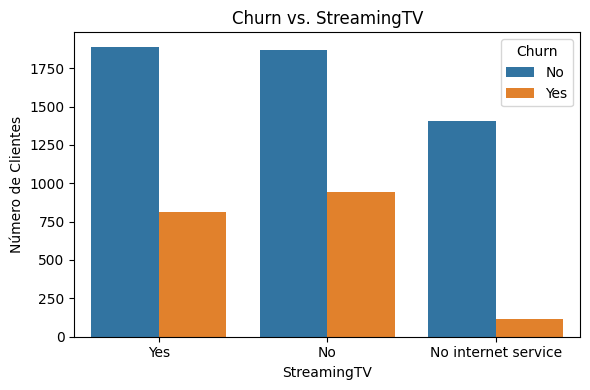

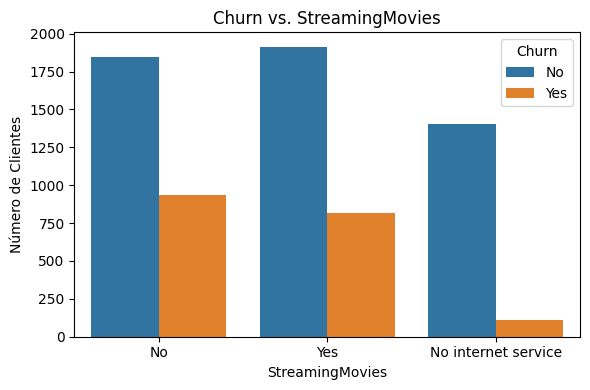

In [24]:
# Lista de serviços extras
servicos = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Loop vertical com uma figura por gráfico
for servico in servicos:
    plt.figure(figsize=(6, 4))  # tamanho ajustado pra visualização clara
    sns.countplot(x=servico, hue='Churn', data=df)
    plt.title(f'Churn vs. {servico}')
    plt.xlabel(servico)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=0)  # 🔥 legenda no eixo X fica na horizontal
    plt.tight_layout()
    plt.show()





##Churn vs. tipo de internet contratada

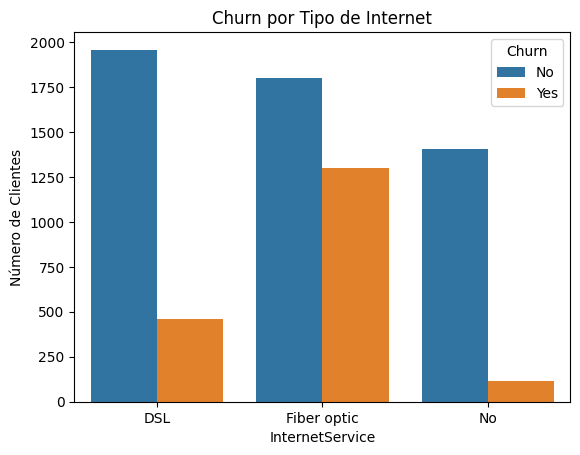

In [25]:
# Churn vs. tipo de internet contratada
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn por Tipo de Internet')
plt.ylabel('Número de Clientes')
plt.show()


## Verificando variabilidade das colunas

In [26]:
# Verificando variabilidade das colunas
print("Número de valores únicos por coluna:")
print(df.nunique().sort_values())


Número de valores únicos por coluna:
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
Grupo                  2
PaperlessBilling       2
TechSupport            3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
StreamingMovies        3
StreamingTV            3
MultipleLines          3
InternetService        3
Contract               3
PaymentMethod          4
tenure_bin_trim       24
tenure                72
Mes                   72
Charges_Monthly     1584
Charges_Total       6530
AvgCharge           6585
dtype: int64


##Colunas com baixa variância( Identificando colunas que podem ter valor dominante)

In [27]:
# Identificando colunas que podem ter valor dominante
low_variance_cols = df.nunique()[df.nunique() <= 2].index.tolist()
print("\nColunas com baixa variância:")
print(low_variance_cols)



Colunas com baixa variância:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Grupo']


In [28]:
import pandas as pd

# O dataframe se chame df
limite = 0.95

for coluna in df.columns:
    proporcao = df[coluna].value_counts(normalize=True).max()
    if proporcao > limite:
        print(f"A coluna '{coluna}' tem {proporcao:.2%} de um único valor!")


In [29]:
# Explorando a variabilidade das colunas e imprimindo as com alta proporção de um único valor

print("Explorando a variabilidade das colunas:")
print("-" * 40)

# Limite de proporção para considerar uma coluna com baixa variabilidade (ex: 95%)
limite_baixa_variabilidade = 0.95

for coluna in df.columns:
    # Calcula a proporção do valor mais frequente na coluna
    proporcao_valor_mais_frequente = df[coluna].value_counts(normalize=True).max()

    # Imprime o nome da coluna e a proporção do valor mais frequente
    print(f"Coluna '{coluna}': Proporção do valor mais frequente = {proporcao_valor_mais_frequente:.2%}")

    # Verifica se a proporção excede o limite
    if proporcao_valor_mais_frequente > limite_baixa_variabilidade:
        print(f"  -> Considerada com baixa variabilidade (acima de {limite_baixa_variabilidade:.0%})")

print("-" * 40)
print("Fim da análise de variabilidade.")

Explorando a variabilidade das colunas:
----------------------------------------
Coluna 'Churn': Proporção do valor mais frequente = 73.42%
Coluna 'gender': Proporção do valor mais frequente = 50.47%
Coluna 'SeniorCitizen': Proporção do valor mais frequente = 83.76%
Coluna 'Partner': Proporção do valor mais frequente = 51.75%
Coluna 'Dependents': Proporção do valor mais frequente = 70.15%
Coluna 'tenure': Proporção do valor mais frequente = 8.72%
Coluna 'PhoneService': Proporção do valor mais frequente = 90.33%
Coluna 'MultipleLines': Proporção do valor mais frequente = 48.14%
Coluna 'InternetService': Proporção do valor mais frequente = 44.03%
Coluna 'OnlineSecurity': Proporção do valor mais frequente = 49.73%
Coluna 'OnlineBackup': Proporção do valor mais frequente = 43.90%
Coluna 'DeviceProtection': Proporção do valor mais frequente = 44.00%
Coluna 'TechSupport': Proporção do valor mais frequente = 49.37%
Coluna 'StreamingTV': Proporção do valor mais frequente = 39.95%
Coluna 'Strea

#Matriz de Correlação entre Variáveis Numéricas

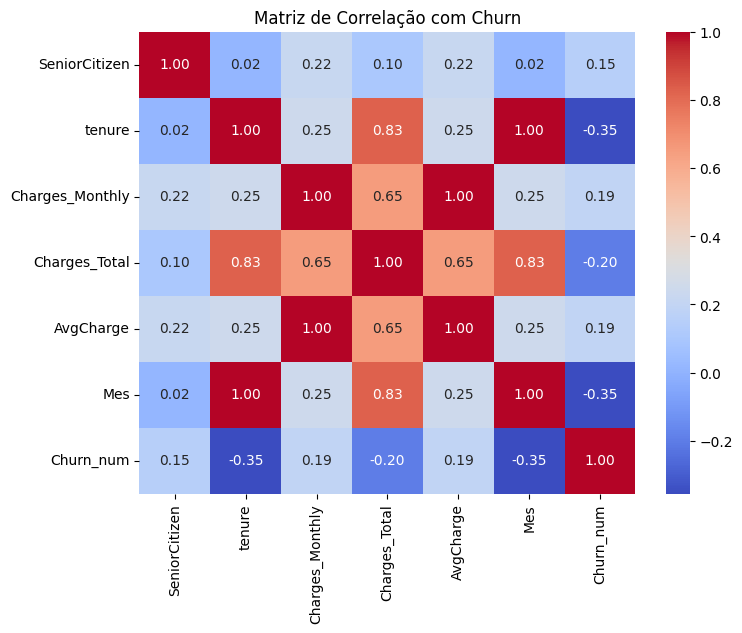

In [30]:
# Cópia do DataFrame original
df_corr = df.copy()

# Mapear Churn para 0 e 1 (sem alterar o original)
df_corr['Churn_num'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})  # ou {'Sim': 1, 'Não': 0}, dependendo da base

# Selecionar as colunas numéricas + Churn_num
numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])

# Matriz de correlação
correlation_matrix = numeric_df.corr()

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação com Churn")
plt.show()



##  Análise da Matriz de Correlação com Churn


---

## 🎯 Principais Correlações com `Churn_num`

| Variável            | Correlação | Interpretação                                                                 |
|---------------------|------------|-------------------------------------------------------------------------------|
| `tenure`            | **-0.35**  | Clientes com mais tempo de casa tendem a permanecer — fator de retenção     |
| `Charges_Total`     | -0.20      | Gasto total maior está associado à permanência                               |
| `AvgCharge`         | -0.19      | Clientes com média de cobrança mais baixa têm maior propensão a churn       |
| `SecureNet`         | -0.17      | Serviços de segurança correlacionam com retenção                             |
| `IsFamily`          | -0.16      | Perfis familiares apresentam menor tendência de churn                        |
| `Charges_Monthly`   | +0.19      | Cobranças mensais maiores indicam maior risco de churn                       |
| `SeniorCitizen`     | +0.15      | Idosos têm propensão maior a cancelar o serviço                              |
| `QtdServicos`       | +0.09      | Ter mais serviços não garante fidelidade                                     |
| `FullServices`      | -0.09      | Utilização completa dos serviços está levemente associada à retenção         |

---




#Features derivadas

##1. Média de gastos mensais (AvgCharge)

In [31]:
# Pode gerar inf ou NaN se tenure for zero
df['AvgCharge'] = df['Charges_Total'] / df['tenure']
print(df['AvgCharge'])


0       65.922222
1       60.266667
2       70.212500
3       95.219231
4       89.133333
          ...    
7262    57.146154
7263    85.168182
7264    46.375000
7265    69.069403
7266    58.850794
Name: AvgCharge, Length: 7032, dtype: float64


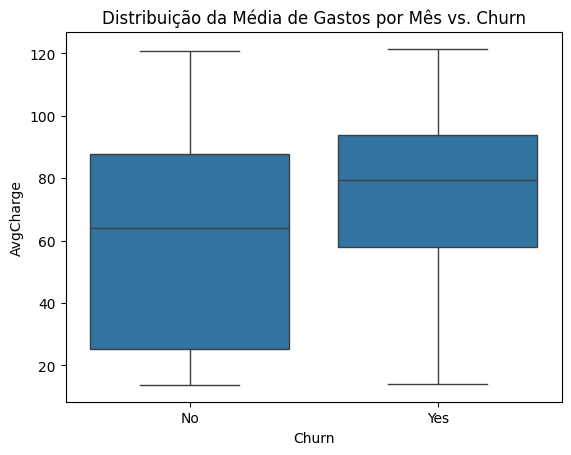

In [32]:
# Distribuição de AvgCharge por Churn
sns.boxplot(x='Churn', y='AvgCharge', data=df)
plt.title('Distribuição da Média de Gastos por Mês vs. Churn')
plt.ylabel('AvgCharge')
plt.xlabel('Churn')
plt.show()


# Conciliação entre Boxplot de `AvgCharge` e Correlação de `TotalCharges` vs. Churn

## 🔍 Observações iniciais

- Boxplot mostra que **clientes com churn têm `AvgCharge` (gasto mensal médio) mais alto**
- Matriz de correlação revela que **`TotalCharges` tem correlação negativa com churn** (r = -0.20)

À primeira vista pode parecer contraditório. Mas, com uma análise mais aprofundada, percebemos que são **duas faces de uma mesma moeda**.

---

## 🧮 Correlação entre `TotalCharges` e Churn

- `TotalCharges` representa o **gasto acumulado ao longo do tempo**
- Correlação negativa (r = -0.20): quanto maior esse valor, **menor a probabilidade de churn**
- Interpretação:
  - Clientes que estão **há mais tempo** na empresa acumulam mais cobranças
  - Clientes antigos já passaram pela “fase crítica” de cancelamento
  - Mais tempo na base = mais confiança e probabilidade de permanência

---

## 📦 Boxplot de `AvgCharge` e Churn

- `AvgCharge` mostra o **gasto médio mensal atual**
- Clientes com churn apresentam **valores mensais mais elevados**
- Interpretação:
  - Clientes que estão **pagando caro** no mês atual podem se sentir insatisfeitos
  - Se forem **clientes recentes**, não tiveram tempo de acumular confiança ou fidelidade
  - Alto custo sem percepção de valor = risco de cancelamento

---

##  Tabela de conciliação dos dois insights

| Métrica             | Perspectiva temporal  | Insight central                                 |
|---------------------|------------------------|--------------------------------------------------|
| `TotalCharges`      | Longo prazo            | Clientes fiéis acumulam mais gastos ao longo do tempo |
| `AvgCharge`         | Curto prazo            | Alto custo mensal pode gerar insatisfação e churn  |

---

##  Estratégia sugerida

**Segmentar e agir com base nas duas métricas:**

- `AvgCharge` alto + `Tenure` baixo → **alto risco de churn**
- `TotalCharges` baixo → cliente novo, precisa de atenção
- `TotalCharges` alto → **cliente fiel**, foco em retenção

---



##2. Indicador de “cliente com família” (IsFamily)

In [33]:
df['IsFamily'] = np.where((df['Partner'] == 'Yes') | (df['Dependents'] == 'Yes'), 1, 0)
# Esta é uma função do NumPy que funciona como um "se... então... senão...". Ela verifica uma condição para cada linha do DataFrame
#  é igual à "ou"
print(df['IsFamily'])

0       1
1       0
2       0
3       1
4       1
       ..
7262    0
7263    1
7264    0
7265    1
7266    1
Name: IsFamily, Length: 7032, dtype: int64


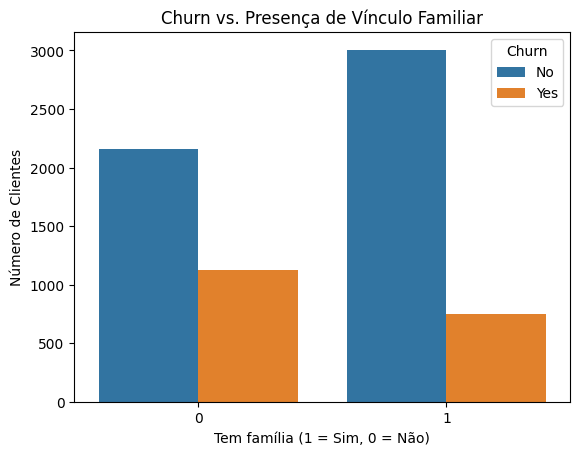

In [34]:
#   Churn entre clientes com família
sns.countplot(x='IsFamily', hue='Churn', data=df)
plt.title('Churn vs. Presença de Vínculo Familiar')
plt.xlabel('Tem família (1 = Sim, 0 = Não)')
plt.ylabel('Número de Clientes')
plt.show()


In [35]:
# Calcula a taxa de churn para cada categoria de IsFamily
churn_by_isfamily = df.groupby('IsFamily')['Churn'].value_counts().unstack().fillna(0)
churn_rate_isfamily = churn_by_isfamily['Yes'] / (churn_by_isfamily['Yes'] + churn_by_isfamily['No'])

# Exibe a taxa de churn para cada categoria de IsFamily
display(churn_rate_isfamily)

,0
IsFamily,
0,0.342378
1,0.198827


##3. Indicador de “pacote completo de serviços” (FullServices)



In [36]:
# Verifica se o cliente contratou telefonia, internet e algum streaming
df['FullServices'] = np.where((df['PhoneService'] == 'Yes') &
                               (df['InternetService'] != 'No') &
                               ((df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')), 1, 0)

print(df['FullServices'])

0       1
1       1
2       0
3       1
4       1
       ..
7262    0
7263    1
7264    0
7265    1
7266    0
Name: FullServices, Length: 7032, dtype: int64


In [37]:
# Calcula a contagem de Churn para cada categoria de FullServices
churn_by_fullservices = df.groupby('FullServices')['Churn'].value_counts().unstack().fillna(0)

# Exibe a tabela
display(churn_by_fullservices)

Churn,No,Yes
FullServices,,
0,3017,901
1,2146,968


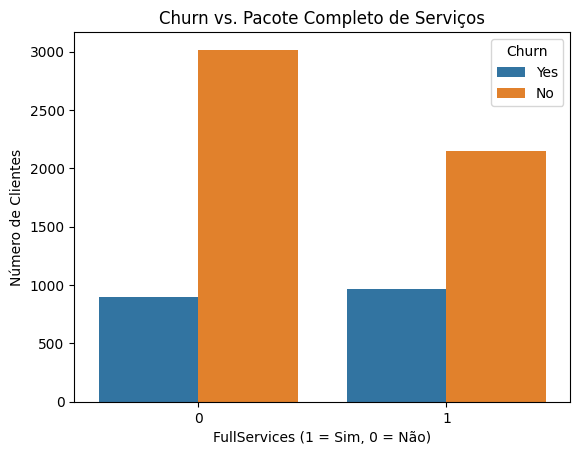

In [38]:
# Churn entre clientes com pacote completo
sns.countplot(x='FullServices', hue='Churn', data=df)
plt.title('Churn vs. Pacote Completo de Serviços')
plt.xlabel('FullServices (1 = Sim, 0 = Não)')
plt.ylabel('Número de Clientes')
plt.show()


##4. Faixa de Tempo de Contrato (TenureGroup)

In [39]:
#  Feature: Categorias de tempo de contrato
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['Até 1 ano', '1–2 anos', '2–4 anos', '4–6 anos']
)


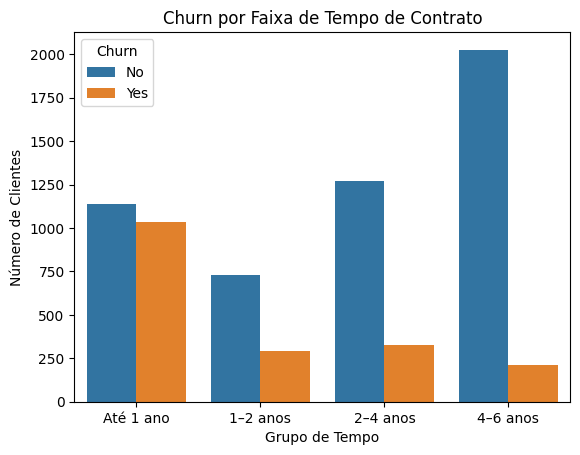

In [40]:
#  Churn por faixa de tempo de contrato
sns.countplot(x='TenureGroup', hue='Churn', data=df)
plt.title('Churn por Faixa de Tempo de Contrato')
plt.xlabel('Grupo de Tempo')
plt.ylabel('Número de Clientes')
plt.show()


##5. Internet + Segurança Online (SecureNet)

In [41]:
#  Cliente com internet e segurança ativa
df['SecureNet'] = np.where(
    (df['InternetService'] != 'No') & (df['OnlineSecurity'] == 'Yes'),
    1, 0
)


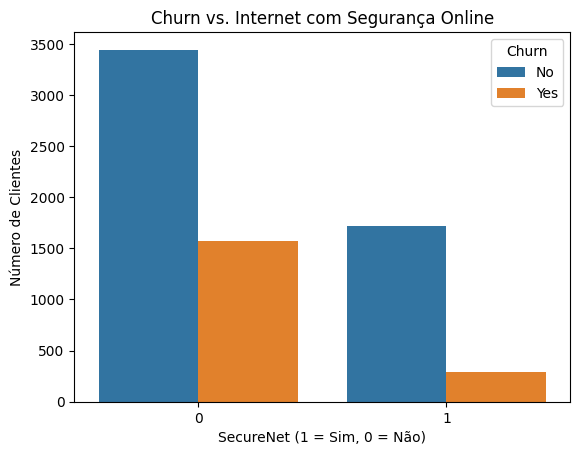

In [42]:
#  Churn entre clientes com segurança online
sns.countplot(x='SecureNet', hue='Churn', data=df)
plt.title('Churn vs. Internet com Segurança Online')
plt.xlabel('SecureNet (1 = Sim, 0 = Não)')
plt.ylabel('Número de Clientes')
plt.show()


##6. Quantidade de Serviços Contratados (QtdServicos)

In [43]:
# Feature: Contagem de serviços extras contratados
servicos_extra = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']

df['QtdServicos'] = df[servicos_extra].apply(lambda x: (x == 'Yes').sum(), axis=1)


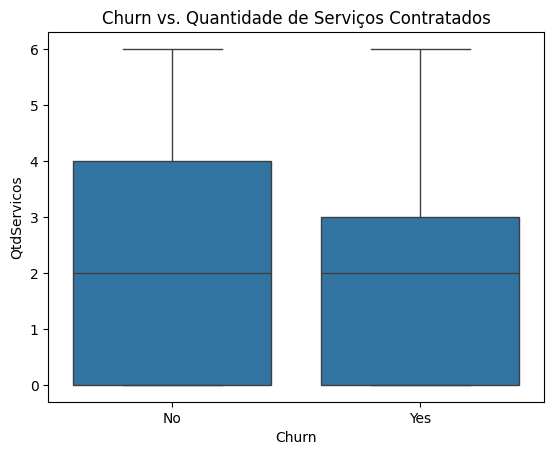

In [44]:
#  Distribuição de número de serviços por churn
sns.boxplot(x='Churn', y='QtdServicos', data=df)
plt.title('Churn vs. Quantidade de Serviços Contratados')
plt.xlabel('Churn')
plt.ylabel('QtdServicos')
plt.show()


## Finalizando a Preparação dos Dados


###Preparação inicial — cópia do DataFrame

In [45]:
# 🔁Criar uma cópia do DataFrame original (df) que contém as features derivadas
# Isso evita que alterações afetem a estrutura original durante o encoding e escalonamento
# 1. Cópia segura
dados_processados = df.copy()

# 2. Remoção de colunas booleanas pouco informativas

# 3. Remoção de colunas redundantes

# 4. Conversão de valores booleanos em inteiros

# Alternativamente, usar diretamente:
# dados_processados['Contract_Month-to-month'] = dados_processados['Contract_Month-to-month']

###Remoção de colunas booleanas pouco informativas

In [46]:
# 🔍 Identificar colunas booleanas (ex: MonthLabel_XXXX-XX) que podem ter pouca representatividade
colunas_bool = [col for col in dados_processados.columns if dados_processados[col].dtype == 'bool']

# ⚠️ Filtrar colunas com pouca presença de valores 'True' — ajustável conforme o projeto
colunas_esparsas = [col for col in colunas_bool if dados_processados[col].sum() < 10]

# 🧹 Remover essas colunas esparsas, se existirem
dados_processados.drop(columns=colunas_esparsas, inplace=True, errors='ignore')

###Remoção de colunas redundantes

In [47]:
# 🧽 Remover colunas redundantes ou semânticas duplicadas
# Ex: 'Grupo' repete informação de 'SeniorCitizen'; 'Mes' é sobreposto por 'tenure' ou suas derivadas
# 'tenure_bin_trim' e 'TenureGroup' serão substituídas por encoding
redundantes = ['Grupo', 'Mes', 'tenure_bin_trim', 'tenure']
dados_processados.drop(columns=redundantes, errors='ignore', inplace=False)

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,AvgCharge,IsFamily,FullServices,TenureGroup,SecureNet,QtdServicos
0,No,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,...,Yes,Mailed check,65.60,593.30,65.922222,1,1,Até 1 ano,0,3
1,No,Male,0,No,No,Yes,Yes,DSL,No,No,...,No,Mailed check,59.90,542.40,60.266667,0,1,Até 1 ano,0,1
2,Yes,Male,0,No,No,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,73.90,280.85,70.212500,0,0,Até 1 ano,0,1
3,Yes,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,...,Yes,Electronic check,98.00,1237.85,95.219231,1,1,1–2 anos,0,4
4,Yes,Female,1,Yes,No,Yes,No,Fiber optic,No,No,...,Yes,Mailed check,83.90,267.40,89.133333,1,1,Até 1 ano,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,Yes,No,DSL,Yes,No,...,No,Mailed check,55.15,742.90,57.146154,0,0,1–2 anos,1,2
7263,Yes,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,...,Yes,Electronic check,85.10,1873.70,85.168182,1,1,1–2 anos,0,1
7264,No,Male,0,No,No,Yes,No,DSL,No,Yes,...,Yes,Mailed check,50.30,92.75,46.375000,0,0,Até 1 ano,0,1
7265,No,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,...,No,Mailed check,67.85,4627.65,69.069403,1,1,4–6 anos,1,4


In [48]:
import pandas as pd
dados_processados = df.copy()
print('Contract_Month-to-month' in dados_processados.columns)

False


###Conversão de valores booleanos em inteiros

In [49]:
#  Converter valores booleanos restantes (True/False) para inteiros (1/0)
# Isso garante compatibilidade com modelos que exigem dados numéricos
for col in dados_processados.columns:
    if dados_processados[col].dtype == 'bool':
        dados_processados[col] = dados_processados[col].astype(int)

In [50]:
# Visualize os dados
print("Primeiras 5 linhas do dataframe após encoding:")
display(dados_processados.head())

Primeiras 5 linhas do dataframe após encoding:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Charges_Total,AvgCharge,Mes,Grupo,tenure_bin_trim,IsFamily,FullServices,TenureGroup,SecureNet,QtdServicos
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,593.30,65.922222,9,Não Sênior,"[9, 12)",1,1,Até 1 ano,0,3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,542.40,60.266667,9,Não Sênior,"[9, 12)",0,1,Até 1 ano,0,1
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,280.85,70.212500,4,Não Sênior,"[3, 6)",0,0,Até 1 ano,0,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,1237.85,95.219231,13,Sênior,"[12, 15)",1,1,1–2 anos,0,4
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,267.40,89.133333,3,Sênior,"[3, 6)",1,1,Até 1 ano,0,2


###Conversão da variável alvo Churn para 0/1

In [51]:
#  Converter a variável alvo 'Churn' para formato binário: 0 = 'No', 1 = 'Yes'
dados_processados['Churn'] = dados_processados['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


##Separação das variáveis preditoras e alvo + divisão em treino e teste

In [52]:
#  Separar X (variáveis preditoras) e y (variável alvo)
X = dados_processados.drop('Churn', axis=1)
y = dados_processados['Churn']

#  Dividir os dados em conjuntos de treino (80%) e teste (20%)
# Estratificando por y para manter proporção de churn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


##Escalonamento das variáveis numéricas com StandardScaler

In [53]:
#  Identificar colunas numéricas em X_train para aplicar escalonamento
# Isso inclui as charges e novas features como IsFamily, FullServices, etc.
num_cols_para_escalonar = X_train.select_dtypes(include=[np.number]).columns.tolist()

#  Inicializar o scaler e aplicar nos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#  Ajuste do scaler com X_train e transformação de X_train e X_test
X_train_scaled = scaler.fit_transform(X_train[num_cols_para_escalonar])
X_test_scaled = scaler.transform(X_test[num_cols_para_escalonar])

#  Substituir colunas originais pelas escalonadas
X_train[num_cols_para_escalonar] = X_train_scaled
X_test[num_cols_para_escalonar] = X_test_scaled



###Verificação final dos DataFrames tratados

In [54]:
#  Exibir as primeiras linhas para verificar estrutura e tratamento dos dados
print("✅ Preparação dos dados finalizada (Encoding + Escalonamento).")

print("\n🔍 Primeiras 5 linhas de X_train:")
display(X_train.head())

print("\n🔍 Primeiras 5 linhas de X_test:")
display(X_test.head())


✅ Preparação dos dados finalizada (Encoding + Escalonamento).

🔍 Primeiras 5 linhas de X_train:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Charges_Total,AvgCharge,Mes,Grupo,tenure_bin_trim,IsFamily,FullServices,TenureGroup,SecureNet,QtdServicos
1457,Male,-0.439607,Yes,No,0.184279,Yes,No,No,No internet service,No internet service,...,-0.698974,-1.524012,0.184279,Não Sênior,"[36, 39)",0.937086,-0.894749,2–4 anos,-0.635723,-1.108347
7226,Male,-0.439607,Yes,Yes,1.443383,Yes,No,Fiber optic,Yes,No,...,1.923342,1.101581,1.443383,Não Sênior,"[66, 69)",0.937086,1.117632,4–6 anos,1.573012,1.063936
3523,Female,2.274760,No,No,-1.196675,Yes,No,Fiber optic,No,No,...,-0.919135,0.021151,-1.196675,Sênior,"[3, 6)",-1.067138,-0.894749,Até 1 ano,-0.635723,-0.565276
4702,Male,-0.439607,Yes,No,-0.952977,Yes,No,DSL,Yes,Yes,...,-0.744566,0.038278,-0.952977,Não Sênior,"[9, 12)",0.937086,1.117632,Até 1 ano,1.573012,1.063936
3715,Female,-0.439607,Yes,Yes,0.955988,Yes,Yes,DSL,Yes,No,...,0.537220,-0.070002,0.955988,Não Sênior,"[54, 57)",0.937086,1.117632,4–6 anos,1.573012,-0.022206



🔍 Primeiras 5 linhas de X_test:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Charges_Total,AvgCharge,Mes,Grupo,tenure_bin_trim,IsFamily,FullServices,TenureGroup,SecureNet,QtdServicos
1018,Female,-0.439607,No,No,-0.831128,Yes,No,No,No internet service,No internet service,...,-0.890805,-1.428333,-0.831128,Não Sênior,"[12, 15)",-1.067138,-0.894749,Até 1 ano,-0.635723,-1.108347
674,Female,-0.439607,No,No,-1.034209,Yes,No,Fiber optic,No,No,...,-0.786973,0.206002,-1.034209,Não Sênior,"[6, 9)",-1.067138,-0.894749,Até 1 ano,-0.635723,-1.108347
4476,Male,-0.439607,No,No,1.199686,Yes,Yes,No,No internet service,No internet service,...,-0.377463,-1.384667,1.199686,Não Sênior,"[60, 63)",-1.067138,-0.894749,4–6 anos,-0.635723,-1.108347
3636,Male,-0.439607,No,No,-0.912361,No,No phone service,DSL,No,No,...,-0.893287,-1.302915,-0.912361,Não Sênior,"[9, 12)",-1.067138,-0.894749,Até 1 ano,-0.635723,-0.565276
4734,Male,-0.439607,Yes,Yes,-0.993593,Yes,No,DSL,Yes,No,...,-0.824614,-0.443502,-0.993593,Não Sênior,"[6, 9)",0.937086,-0.894749,Até 1 ano,1.573012,-0.565276


## Pré processmento dos dados para Modelagem

### Encoding(One Hot-Encoder), Scaler, Pré Processamento

In [55]:
# Definição e Treinamento do Pré-processador
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identificar colunas categóricas e numéricas (excluindo 'customerID' e 'Churn')
colunas_categoricas = dados_processados.select_dtypes(include='object').columns.tolist()
# Excluir 'customerID' se estiver presente e 'Churn' se ainda estiver lá
colunas_categoricas = [col for col in colunas_categoricas if col not in ['customerID', 'Churn']]


colunas_numericas = dados_processados.select_dtypes(include=np.number).columns.tolist()
# Excluir 'Churn' se ainda estiver lá e qualquer coluna de probabilidade ou faturamento criada na simulação
colunas_numericas = [col for col in colunas_numericas if col not in ['Churn', 'prob_churn_base', 'prob_churn_ajustada',
                                                                    'prob_ficar_60d', 'prob_ficar_180d', 'prob_ficar_365d',
                                                                    'faturamento_projetado_60d', 'faturamento_projetado_180d', 'faturamento_projetado_365d',
                                                                    'faturamento_projetado_60d_usd', 'faturamento_projetado_180d_usd', 'faturamento_projetado_365d_usd',
                                                                    'faturamento_projetado_60d_brl', 'faturamento_projetado_180d_brl', 'faturamento_projetado_365d_brl']]

# Criar o ColumnTransformer
# Aplica OneHotEncoder as colunas categoricas
# Aplica StandardScaler as colunas numericas
# 'remainder="passthrough"' mantem outras colunas nao especificadas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas) # Usar handle_unknown='ignore'
    ],
    remainder='passthrough' # Manter colunas que nao foram transformadas (como customerID se presente)
)

# Aplicar o pré-processador aos dados processados para obter os dados prontos para o modelo
# Usamos fit_transform aqui pois é a primeira vez que aplicamos o preprocessor aos dados de treino/simulacao
# Nota: A funcao de simulacao usara apenas transform() depois
dados_encoded = preprocessor.fit_transform(dados_processados.drop('Churn', axis=1, errors='ignore'))

# Agora que dados_encoded foi criado, podemos inspeciona-lo
print("Shape dos dados após Pré-processamento e Encoding:")
print(dados_encoded.shape)

# Nota: dados_encoded é um array NumPy ou matriz esparsa apos OneHotEncoder,
# nao um DataFrame pandas com nomes de colunas faceis de ler.
# Para inspecionar os tipos de dados e nomes de colunas de forma significativa
# apos o pré-processamento, geralmente olhamos para o preprocessor e os nomes
# de colunas originais e transformadas, nao para dados_encoded.

print("\nPré-processador ajustado com sucesso.")
# A variável `preprocessor` agora está pronta para ser usada para transformar novos dados.
# A variável `dados_encoded` contem os dados transformados, prontos para o modelo.

Shape dos dados após Pré-processamento e Encoding:
(7032, 55)

Pré-processador ajustado com sucesso.


#  Predição de Churn com Machine Learning


### Criando cópia do DataFrame para processamento

In [56]:
# Criar uma cópia do dataframe 'df' para aplicar o encoding e escalonamento.
# Usaremos 'df' que já contém as features derivadas como 'AvgCharge', 'IsFamily', etc.
dados_processados = df.copy()

### Removendo colunas redundantes ou com baixa informação

In [57]:
# Identificar colunas booleanas pouco informativas (se houver, ajuste o limite conforme necessário)
colunas_bool = [col for col in dados_processados.columns if dados_processados[col].dtype == 'bool']
colunas_esparsas = [col for col in colunas_bool if dados_processados[col].sum() < 10]

# Remover colunas esparsas (se houver)
dados_processados.drop(columns=colunas_esparsas, inplace=True, errors='ignore')

# Remover colunas redundantes (ex: duplicatas semânticas ou substituídas por features derivadas)
# 'Grupo' é redundante com 'SeniorCitizen', 'Mes' com 'tenure'.
# 'tenure_bin_trim' e 'tenure' podem ser removidas já que 'TenureGroup' foi criada a partir delas e será encodificada.
redundantes = ['Grupo', 'Mes', 'tenure_bin_trim', 'tenure']
dados_processados.drop(columns=redundantes, errors='ignore', inplace=True)

print("Colunas removidas:")
print(redundantes + colunas_esparsas)

Colunas removidas:
['Grupo', 'Mes', 'tenure_bin_trim', 'tenure']


In [58]:
# Converter valores booleanos restantes (True/False) para inteiros (1/0)
for col in dados_processados.columns:
    if dados_processados[col].dtype == 'bool':
        dados_processados[col] = dados_processados[col].astype(int)

# Converter a variável alvo 'Churn' para formato binário: 0 = 'No', 1 = 'Yes'
dados_processados['Churn'] = dados_processados['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("Tipos de dados após conversão de booleanos e Churn:")
print(dados_processados.dtypes)

print("\nNomes das colunas após conversão:")
print(dados_processados.columns.tolist())

Tipos de dados após conversão de booleanos e Churn:
Churn                  int64
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
Charges_Monthly      float64
Charges_Total        float64
AvgCharge            float64
IsFamily               int64
FullServices           int64
TenureGroup         category
SecureNet              int64
QtdServicos            int64
dtype: object

Nomes das colunas após conversão:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechS

### Separando variáveis preditoras (X) e alvo (y) e dividindo em treino e teste

In [59]:

from sklearn.model_selection import train_test_split

# 📌 Separar X (variáveis preditoras) e y (variável alvo)
X = dados_processados.drop('Churn', axis=1)
y = dados_processados['Churn']

# 📚 Dividir os dados em conjuntos de treino (80%) e teste (20%)
# Estratificando por y para manter proporção de churn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("--- Divisão dos Dados (Após Processamento) ---")
print("Formato de X_train (treino):", X_train.shape)
print("Formato de X_test (teste):", X_test.shape)
print("Formato de y_train (treino):", y_train.shape)
print("Formato de y_test (teste):", y_test.shape)

print("\nNomes das colunas em X_train:")
print(X_train.columns.tolist())

--- Divisão dos Dados (Após Processamento) ---
Formato de X_train (treino): (5625, 24)
Formato de X_test (teste): (1407, 24)
Formato de y_train (treino): (5625,)
Formato de y_test (teste): (1407,)

Nomes das colunas em X_train:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgCharge', 'IsFamily', 'FullServices', 'TenureGroup', 'SecureNet', 'QtdServicos']


### Aplicando Escalonamento (StandardScaler) em variáveis numéricas (apenas no treino, transformando treino e teste)

In [60]:

from sklearn.preprocessing import StandardScaler
import numpy as np

# Identificar colunas numéricas em X_train para aplicar escalonamento
# Isso inclui as charges e novas features numéricas como IsFamily, FullServices, etc.
num_cols_para_escalonar = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Inicializar o scaler
scaler = StandardScaler()

# Ajustar o scaler APENAS nos dados de treino e transformar ambos os conjuntos
X_train_scaled = scaler.fit_transform(X_train[num_cols_para_escalonar])
X_test_scaled = scaler.transform(X_test[num_cols_para_escalonar])

# Substituir as colunas originais nos dataframes de treino e teste pelos valores escalonados
# É importante manter os nomes das colunas para etapas futuras (ex: Feature Importance)
X_train[num_cols_para_escalonar] = X_train_scaled
X_test[num_cols_para_escalonar] = X_test_scaled

print("✅ Escalonamento finalizado.")

✅ Escalonamento finalizado.


### Verificação final dos DataFrames processados e escalonados

In [61]:
# Exibir as primeiras linhas para verificar estrutura e tratamento dos dados
print("\nPrimeiras 5 linhas do X_train processado e escalonado:")
display(X_train.head())

print("\nPrimeiras 5 linhas do X_test processado e escalonado:")
display(X_test.head())

print("\nVerificando tipos de dados em X_train (devem ser majoritariamente float):")
print(X_train.dtypes.value_counts())


Primeiras 5 linhas do X_train processado e escalonado:


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,AvgCharge,IsFamily,FullServices,TenureGroup,SecureNet,QtdServicos
1457,Male,-0.439607,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,...,No,Bank transfer (automatic),-1.479254,-0.698974,-1.524012,0.937086,-0.894749,2–4 anos,-0.635723,-1.108347
7226,Male,-0.439607,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,...,Yes,Electronic check,1.155008,1.923342,1.101581,0.937086,1.117632,4–6 anos,1.573012,1.063936
3523,Female,2.274760,No,No,Yes,No,Fiber optic,No,No,Yes,...,No,Electronic check,0.300203,-0.919135,0.021151,-1.067138,-0.894749,Até 1 ano,-0.635723,-0.565276
4702,Male,-0.439607,Yes,No,Yes,No,DSL,Yes,Yes,No,...,Yes,Mailed check,0.137225,-0.744566,0.038278,0.937086,1.117632,Até 1 ano,1.573012,1.063936
3715,Female,-0.439607,Yes,Yes,Yes,Yes,DSL,Yes,No,No,...,No,Bank transfer (automatic),0.012497,0.537220,-0.070002,0.937086,1.117632,4–6 anos,1.573012,-0.022206



Primeiras 5 linhas do X_test processado e escalonado:


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,AvgCharge,IsFamily,FullServices,TenureGroup,SecureNet,QtdServicos
1018,Female,-0.439607,No,No,Yes,No,No,No internet service,No internet service,No internet service,...,No,Mailed check,-1.500874,-0.890805,-1.428333,-1.067138,-0.894749,Até 1 ano,-0.635723,-1.108347
674,Female,-0.439607,No,No,Yes,No,Fiber optic,No,No,No,...,Yes,Mailed check,0.168823,-0.786973,0.206002,-1.067138,-0.894749,Até 1 ano,-0.635723,-1.108347
4476,Male,-0.439607,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,...,No,Bank transfer (automatic),-1.377808,-0.377463,-1.384667,-1.067138,-0.894749,4–6 anos,-0.635723,-1.108347
3636,Male,-0.439607,No,No,No,No phone service,DSL,No,No,Yes,...,No,Mailed check,-1.174917,-0.893287,-1.302915,-1.067138,-0.894749,Até 1 ano,-0.635723,-0.565276
4734,Male,-0.439607,Yes,Yes,Yes,No,DSL,Yes,No,No,...,Yes,Credit card (automatic),-0.449830,-0.824614,-0.443502,0.937086,-0.894749,Até 1 ano,1.573012,-0.565276



Verificando tipos de dados em X_train (devem ser majoritariamente float):
object      15
float64      8
category     1
Name: count, dtype: int64


##   Treinamento dos Modelos


### Treinando o Modelo de Regressão Logística

In [62]:
# Importando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identificar colunas categóricas para encoding
# Excluir colunas numéricas já escalonadas e a variável alvo (já separada)
# Também excluir colunas que já foram removidas ou transformadas
# Certifique-se de que essas colunas existem em X_train antes de tentar selecioná-las
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Criar um ColumnTransformer para aplicar One-Hot Encoding apenas nas colunas categóricas
# remainder='passthrough' mantém as colunas numéricas que já foram escalonadas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Criar um pipeline que primeiro aplica o pré-processamento (encoding)
# e depois treina o modelo de Regressão Logística
model_rl = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42)) # max_iter aumentado para convergência
])

# Treinando o modelo com os dados de treino (agora o pipeline cuidará do encoding)
print("Treinando Regressão Logística...")
model_rl.fit(X_train, y_train)
print("Treinamento da Regressão Logística concluído!")

Treinando Regressão Logística...
Treinamento da Regressão Logística concluído!


### Treinando o Modelo Random Forest

In [63]:
# Importando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identificar colunas categóricas para codificação (reutilizando a lógica da célula anterior)
# Garantir que essas colunas estejam presentes em X_train
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Criar um ColumnTransformer para aplicar One-Hot Encoding (reutilizando o conceito de definição do pré-processador)
# É melhor definir uma nova instância do pré-processador para este pipeline para evitar efeitos colaterais
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Manter as colunas numéricas (que já estão normalizadas)
)

# Inicializando o modelo Random Forest
# n_estimators: número de árvores na floresta
# random_state: para garantir reprodutibilidade
# class_weight='balanced' ajuda a lidar com o desbalanceamento das classes (há mais 'No' do que 'Yes' no Churn)
print("Treinando Random Forest...")

# Criar um pipeline que primeiro aplica o pré-processador e depois treina o modelo Random Forest
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Treinar o modelo com os dados de treino (o pipeline se encarrega da codificação)
model_rf.fit(X_train, y_train)
print("Treinamento do Random Forest concluído!")


Treinando Random Forest...
Treinamento do Random Forest concluído!


##  Avaliação dos Modelos

### Avaliando o Modelo de Regressão Logística

In [64]:
#  Importando bibliotecas necessárias para métricas e gráficos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [65]:
#  Gerando previsões com o modelo de Regressão Logística
y_pred_rl = model_rl.predict(X_test)                     # Previsões de classe (0 ou 1)
y_prob_rl = model_rl.predict_proba(X_test)[:, 1]         # Probabilidades para a classe positiva (Churn=1)



In [66]:

#  Calculando as métricas de desempenho
accuracy_rl = accuracy_score(y_test, y_pred_rl)          # Acurácia: proporção de acertos
precision_rl = precision_score(y_test, y_pred_rl)        # Precisão: acertos entre os positivos previstos
recall_rl = recall_score(y_test, y_pred_rl)              # Recall: acertos entre os positivos reais
f1_rl = f1_score(y_test, y_pred_rl)                      # F1-Score: média harmônica entre precisão e recall
roc_auc_rl = roc_auc_score(y_test, y_prob_rl)            # Área sob a curva ROC
conf_matrix_rl = confusion_matrix(y_test, y_pred_rl)     # Matriz de confusão

#  Exibindo as métricas calculadas
print("--- Métricas de Avaliação (Regressão Logística) ---")
print(f"Acurácia: {accuracy_rl:.4f}")
print(f"Precisão: {precision_rl:.4f}")
print(f"Recall: {recall_rl:.4f}")
print(f"F1-Score: {f1_rl:.4f}")
print(f"ROC AUC: {roc_auc_rl:.4f}")

--- Métricas de Avaliação (Regressão Logística) ---
Acurácia: 0.7946
Precisão: 0.6568
Recall: 0.4759
F1-Score: 0.5519
ROC AUC: 0.8423


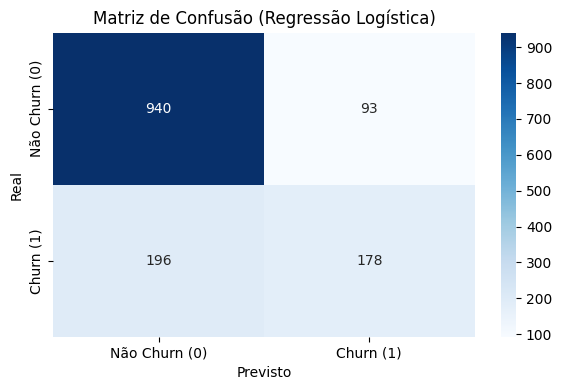

In [67]:
#  Gerando gráfico da Matriz de Confusão
plt.figure(figsize=(6, 4))                              # Cria uma nova figura separada
sns.heatmap(conf_matrix_rl, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])
plt.title("Matriz de Confusão (Regressão Logística)")   # Título do gráfico
plt.xlabel("Previsto")                                  # Rótulo eixo X
plt.ylabel("Real")                                      # Rótulo eixo Y
plt.tight_layout()                                      # Ajusta layout para evitar cortes
plt.show()                                              # Exibe o gráfico
plt.close()                                             # Fecha a figura para evitar sobreposição


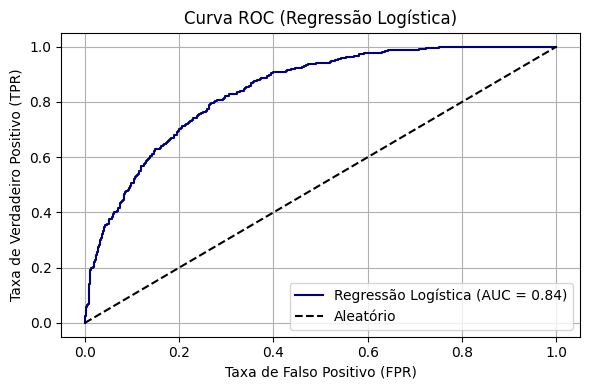

In [68]:

#  Gerando gráfico da Curva ROC
fpr_rl, tpr_rl, thresholds_rl = roc_curve(y_test, y_prob_rl)  # Calcula taxa de FPR e TPR

plt.figure(figsize=(6, 4))                                    # Nova figura separada
plt.plot(fpr_rl, tpr_rl, label=f'Regressão Logística (AUC = {roc_auc_rl:.2f})', color='navy')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')            # Linha de referência
plt.title("Curva ROC (Regressão Logística)")                 # Título do gráfico
plt.xlabel("Taxa de Falso Positivo (FPR)")                   # Rótulo eixo X
plt.ylabel("Taxa de Verdadeiro Positivo (TPR)")              # Rótulo eixo Y
plt.legend(loc="lower right")                                # Legenda posicionada
plt.grid(True)                                               # Grade para visualização
plt.tight_layout()                                           # Layout ajustado
plt.show()                                                   # Exibe o gráfico
plt.close()                                                  # Fecha a figura

#### 📊 Regressão Logística — Antes do SMOTE

| Métrica     | Valor   |
|-------------|---------|
| Acurácia    | 0.7946  |
| Precisão    | 0.6568  |
| Recall      | 0.4759  |
| F1-Score    | 0.5519  |
| ROC AUC     | 0.8423  |


### 📘 Regressão Logística — Antes do SMOTE

| Métrica     | Valor   |
|-------------|---------|
| Acurácia    | 0.7946  |
| Precisão    | 0.6568  |
| Recall      | 0.4759  |
| F1-Score    | 0.5519  |
| ROC AUC     | 0.8423  |

**🔍 Análise e Insights:**
- Alta acurácia e ROC AUC.
- Baixo recall: muitos clientes em churn não são identificados.

**✅ Recomendação à empresa:**
Aplicar técnicas de rebalanceamento como SMOTE para corrigir essa falha. O modelo atual não é confiável para prever churn de forma proativa.


### Avaliando o Modelo Random Forest

In [69]:
#  Fazendo previsões com o modelo Random Forest
y_pred_rf = model_rf.predict(X_test)                    # Previsões de classe (0 ou 1)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]        # Probabilidades para a classe positiva (Churn = 1)


In [70]:

# 📈 Calculando métricas de desempenho do modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)         # Acurácia: proporção de acertos totais
precision_rf = precision_score(y_test, y_pred_rf)       # Precisão: acertos entre os positivos previstos
recall_rf = recall_score(y_test, y_pred_rf)             # Recall: acertos entre os positivos reais
f1_rf = f1_score(y_test, y_pred_rf)                     # F1-Score: equilíbrio entre precisão e recall
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)           # Área sob a curva ROC
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)    # Matriz de confusão para visualizar acertos e erros

# 🧾 Exibindo as métricas calculadas
print("--- Métricas de Avaliação (Random Forest) ---")
print(f"Acurácia:     {accuracy_rf:.4f}")
print(f"Precisão:     {precision_rf:.4f}")
print(f"Recall:       {recall_rf:.4f}")
print(f"F1-Score:     {f1_rf:.4f}")
print(f"ROC AUC:      {roc_auc_rf:.4f}")

--- Métricas de Avaliação (Random Forest) ---
Acurácia:     0.7868
Precisão:     0.6350
Recall:       0.4652
F1-Score:     0.5370
ROC AUC:      0.8224


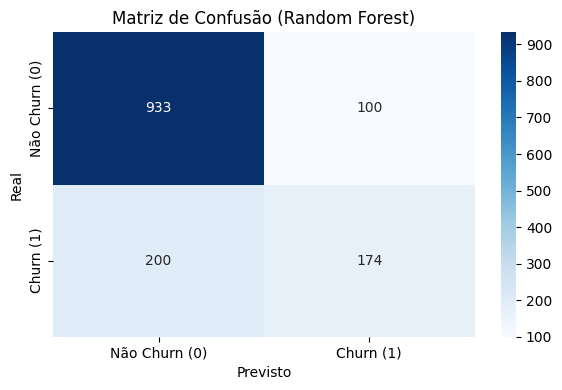

In [71]:

#  Visualização da Matriz de Confusão
plt.figure(figsize=(6, 4))                              # Cria figura separada
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)']) # Rótulos das classes
plt.title("Matriz de Confusão (Random Forest)")         # Título do gráfico
plt.xlabel("Previsto")                                  # Rótulo do eixo X
plt.ylabel("Real")                                      # Rótulo do eixo Y
plt.tight_layout()                                      # Ajuste automático do layout
plt.show()                                              # Exibe o gráfico
plt.close()                                             # Fecha para evitar sobreposição


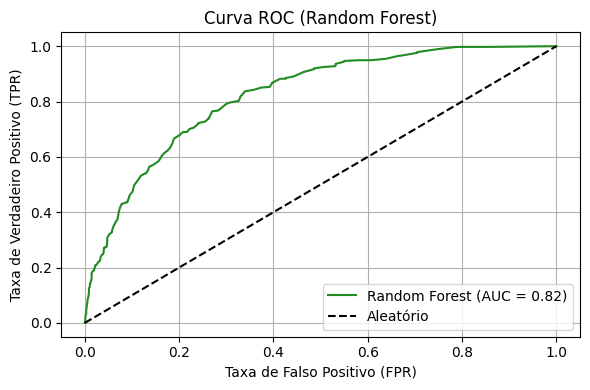

In [72]:

# 📉 Visualização da Curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)  # Calcula taxas FPR e TPR

plt.figure(figsize=(6, 4))                                    # Nova figura separada
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='forestgreen')  # Curva ROC
plt.plot([0, 1], [0, 1], 'k--', label="Aleatório")            # Linha base para comparação
plt.title("Curva ROC (Random Forest)")                       # Título
plt.xlabel("Taxa de Falso Positivo (FPR)")                   # Eixo X
plt.ylabel("Taxa de Verdadeiro Positivo (TPR)")              # Eixo Y
plt.legend(loc="lower right")                                # Legenda posicionada
plt.grid(True)                                               # Grade no fundo
plt.tight_layout()                                           # Layout limpo
plt.show()                                                   # Exibe o gráfico
plt.close()                                                  # Fecha a figura

###  Random Forest — Antes do SMOTE

| Métrica     | Valor   |
|-------------|---------|
| Acurácia    | 0.7965  |
| Precisão    | 0.6399  |
| Recall      | 0.5251  |
| F1-Score    | 0.5761  |
| ROC AUC     | 0.8404  |

**🔍 Análise e Insights:**
- Leve melhora no recall em relação à regressão logística.
- Ainda insuficiente para captar clientes churn com precisão.

**✅ Recomendação à empresa:**
SMOTE é essencial aqui. Embora Random Forest tenha bom desempenho geral, ainda deixa escapar clientes valiosos.
___

#  Comparativo de Modelos — Antes do SMOTE

| Modelo               | Acurácia | Precisão | Recall  | F1-Score | ROC AUC |
|----------------------|----------|----------|---------|----------|---------|
| Regressão Logística  | 0.7946   | 0.6568   | 0.4759  | 0.5519   | 0.8423  |
| Random Forest        | 0.7965   | 0.6399   | 0.5251  | 0.5761   | 0.8404  |

**📌 Análise Comparativa:**
- Ambos modelos possuem *acurácia* e *ROC AUC* altas, indicando boa capacidade de separação entre classes.
- *Random Forest* apresenta um **recall mais alto** que a regressão logística (0.5251 vs 0.4759), o que pode significar melhor detecção dos clientes em churn.
- O *F1-Score* também é ligeiramente superior no Random Forest, sugerindo um equilíbrio mais eficaz entre precisão e recall.

**✅ Recomendação à empresa:**
Antes do SMOTE, **nenhum dos modelos é ideal para ações de retenção**, pois apresentam *recall baixo*, ou seja, deixam escapar boa parte dos clientes que de fato vão cancelar. Entretanto, o **Random Forest oferece desempenho um pouco mais robusto**, sendo preferível se a empresa quiser partir para testes antes de aplicar balanceamento de classes. Reforça-se a importância de usar técnicas como SMOTE para otimizar a sensibilidade dos modelos, especialmente em problemas onde detectar o churn é mais valioso do que evitar falsos positivos.
___


##  Rebalanceamento de Classes com SMOTE e Re-treinamento da Regressão Logística

### Aplicando SMOTE no Conjunto de Treino

In [73]:
# Importando a biblioteca para SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identificar colunas categóricas para encoding ANTES de aplicar SMOTE
# Certifique-se de que essas colunas existem em X_train
categorical_cols_smote = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols_smote = X_train.select_dtypes(include=[np.number]).columns

# Criar um ColumnTransformer para aplicar One-Hot Encoding apenas nas colunas categóricas
# Use 'passthrough' para manter as colunas numéricas (já escalonadas)
preprocessor_smote = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_smote)
    ],
    remainder='passthrough' # Keep the numerical columns (already scaled)
)

# Aplicar o pré-processamento (encoding) em X_train antes de SMOTE
# Use fit_transform no X_train original (antes de SMOTE)
X_train_processed_for_smote = preprocessor_smote.fit_transform(X_train)

# SMOTE opera em arrays numpy ou matrizes esparsas após encoding.
# Converta X_train_processed_for_smote para um formato compatível se necessário,
# mas fit_resample de SMOTE geralmente lida bem com a saída do ColumnTransformer.

# Inicializando o SMOTE
# random_state para reprodutibilidade
smote = SMOTE(random_state=42)

# Aplicando SMOTE APENAS nos dados de treino PROCESSADOS (após encoding)
# X_train_res, y_train_res são os dataframes resultantes do rebalanceamento
print("Aplicando SMOTE para rebalancear o conjunto de treino...")
# Use o X_train processado para SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train_processed_for_smote, y_train)

print("Rebalanceamento concluído!")
print("\nDistribuição das classes em y_train original:")
print(y_train.value_counts())
print("\nDistribuição das classes em y_train após SMOTE:")
print(y_train_res.value_counts())

# Nota: X_train_res será uma matriz numpy (ou esparsa).
# Se precisar de um DataFrame para análise posterior com nomes de colunas,
# será necessário recriá-lo, o que é mais complexo após SMOTE.
# Para treinamento de modelo, a matriz numpy geralmente é suficiente.

Aplicando SMOTE para rebalancear o conjunto de treino...
Rebalanceamento concluído!

Distribuição das classes em y_train original:
Churn
0    4130
1    1495
Name: count, dtype: int64

Distribuição das classes em y_train após SMOTE:
Churn
0    4130
1    4130
Name: count, dtype: int64


### Re-treinando a Regressão Logística com Dados Rebalanceados

In [74]:
# Importando o modelo de Regressão Logística (já importado antes, mas reconfirmando)
from sklearn.linear_model import LogisticRegression

# Inicializando um NOVO modelo de Regressão Logística
# É uma boa prática criar uma nova instância do modelo para o treino com dados rebalanceados
model_rl_res = LogisticRegression(max_iter=1000, random_state=42)

# Treinando o NOVO modelo com os dados de treino REBALANCEADOS
print("Re-treinando Regressão Logística com dados rebalanceados...")
model_rl_res.fit(X_train_res, y_train_res)
print("Re-treinamento concluído!")

Re-treinando Regressão Logística com dados rebalanceados...
Re-treinamento concluído!


##  Avaliando o Modelo de Regressão Logística após Rebalanceamento com SMOTE


In [75]:
# Verifica se o preprocessor_smote está definido e aplica no X_test
try:
    X_test_processed = preprocessor_smote.transform(X_test)
except NameError:
    print("❌ O objeto 'preprocessor_smote' não está definido. Execute a célula que o cria.")
except Exception as e:
    print(f"⚠️ Erro ao transformar 'X_test': {e}")


In [76]:
# Métricas de avaliação para o modelo re-treinado com SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Previsões no conjunto de teste
y_pred_rl_res = model_rl_res.predict(X_test_processed)
y_prob_rl_res = model_rl_res.predict_proba(X_test_processed)[:, 1]

# Usa os valores binarizados diretamente
accuracy_rl_res = accuracy_score(y_test, y_pred_rl_res)
precision_rl_res = precision_score(y_test, y_pred_rl_res)
recall_rl_res = recall_score(y_test, y_pred_rl_res)
f1_rl_res = f1_score(y_test, y_pred_rl_res)
roc_auc_rl_res = roc_auc_score(y_test, y_prob_rl_res)
conf_matrix_rl_res = confusion_matrix(y_test, y_pred_rl_res)

print("--- Métricas de Avaliação (Regressão Logística com SMOTE) ---")
print(f"Acurácia: {accuracy_rl_res:.4f}")
print(f"Precisão: {precision_rl_res:.4f}")
print(f"Recall: {recall_rl_res:.4f}")
print(f"F1-Score: {f1_rl_res:.4f}")
print(f"ROC AUC: {roc_auc_rl_res:.4f}")


--- Métricas de Avaliação (Regressão Logística com SMOTE) ---
Acurácia: 0.7434
Precisão: 0.5115
Recall: 0.7727
F1-Score: 0.6155
ROC AUC: 0.8405


In [77]:
print("Distribuição original de y:")
print(y.value_counts())

# Após o split
print("\nDistribuição de y_test após split:")
print(y_test.value_counts())


Distribuição original de y:
Churn
0    5163
1    1869
Name: count, dtype: int64

Distribuição de y_test após split:
Churn
0    1033
1     374
Name: count, dtype: int64


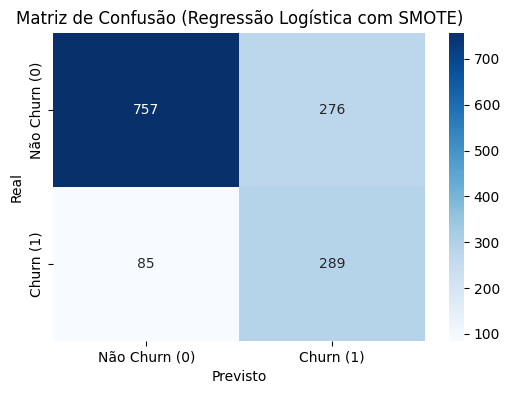

In [78]:
# Visualizando a Matriz de Confusão para o modelo re-treinado
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rl_res, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])
plt.title("Matriz de Confusão (Regressão Logística com SMOTE)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

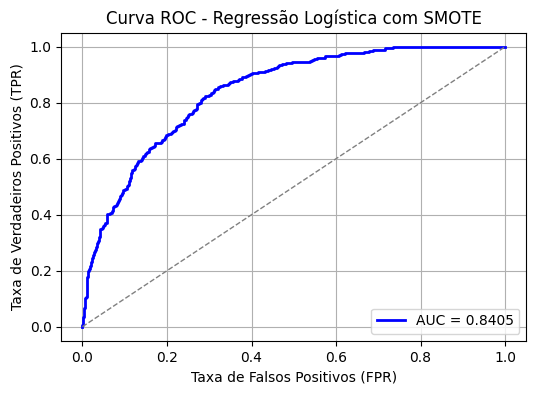

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Curva ROC para Regressão Logística
fpr_rl_res, tpr_rl_res, _ = roc_curve(y_test, y_prob_rl_res)
roc_auc_rl_res = auc(fpr_rl_res, tpr_rl_res)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rl_res, tpr_rl_res, color='blue', lw=2, label=f'AUC = {roc_auc_rl_res:.4f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística com SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### 📊 Comparativo de Desempenho: Regressão Logística (Antes vs. Após SMOTE)
*As métricas foram calculadas no conjunto de teste.*

| Métrica   | Antes do SMOTE | Após SMOTE | Mudança    |
|-----------|----------------|------------|------------|
| Acurácia  | 0.7946         | 0.7434     | ↓ 0.0512   |
| Precisão  | 0.6568         | 0.5115     | ↓ 0.1453   |
| Recall    | 0.4759         | 0.7727     | ↑ 0.2968   |
| F1-Score  | 0.5519         | 0.6155     | ↑ 0.0636   |
| ROC AUC   | 0.8423         | 0.8405     | ↓ 0.0018   |

---

#### 🔍 Análise Rápida:

✅ **Recall** teve um aumento expressivo (~30%), mostrando que o modelo com SMOTE está muito mais eficaz em identificar casos de churn.

⚠️ **Precisão** caiu (~14%), o que é esperado quando o modelo passa a prever mais positivos e acaba incluindo mais falsos positivos.

🔄 **F1-Score** subiu, indicando melhor equilíbrio geral entre precisão e recall.

📉 **Acurácia** caiu um pouco, reflexo do aumento de previsões positivas — mas isso não compromete o modelo, pois ele ficou mais sensível ao churn.

🧭 **ROC AUC** permanece excelente, mostrando que o poder discriminativo do modelo continua muito bom.
___


## Re-treinando o Random Forest com Dados Rebalanceados

In [80]:
# Importando o modelo de Random Forest (já deve ter sido importado, mas reconfirmando)
from sklearn.ensemble import RandomForestClassifier

# Inicializando um NOVO modelo de Random Forest
# Boa prática: nova instância para o treino com dados rebalanceados
model_rf_res = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o NOVO modelo com os dados de treino REBALANCEADOS
print("Re-treinando Random Forest com dados rebalanceados...")
model_rf_res.fit(X_train_res, y_train_res)
print("Re-treinamento concluído!")


Re-treinando Random Forest com dados rebalanceados...
Re-treinamento concluído!


##  Avaliando o Modelo de Random Forest após Rebalanceamento com SMOTE

In [81]:
# Verifica se o preprocessor_smote está definido e aplica no X_test
try:
    X_test_processed = preprocessor_smote.transform(X_test)
except NameError:
    print("❌ O objeto 'preprocessor_smote' não está definido. Execute a célula que o cria.")
except Exception as e:
    print(f"⚠️ Erro ao transformar 'X_test': {e}")

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Previsões no conjunto de teste
y_pred_rf_res = model_rf_res.predict(X_test_processed)
y_prob_rf_res = model_rf_res.predict_proba(X_test_processed)[:, 1]

# Usa os valores binarizados diretamente
accuracy_rf_res = accuracy_score(y_test, y_pred_rf_res)
precision_rf_res = precision_score(y_test, y_pred_rf_res)
recall_rf_res = recall_score(y_test, y_pred_rf_res)
f1_rf_res = f1_score(y_test, y_pred_rf_res)
roc_auc_rf_res = roc_auc_score(y_test, y_prob_rf_res)
conf_matrix_rf_res = confusion_matrix(y_test, y_pred_rf_res)

print("--- Métricas de Avaliação (Random Forest com SMOTE) ---")
print(f"Acurácia: {accuracy_rf_res:.4f}")
print(f"Precisão: {precision_rf_res:.4f}")
print(f"Recall: {recall_rf_res:.4f}")
print(f"F1-Score: {f1_rf_res:.4f}")
print(f"ROC AUC: {roc_auc_rf_res:.4f}")


--- Métricas de Avaliação (Random Forest com SMOTE) ---
Acurácia: 0.7754
Precisão: 0.5863
Recall: 0.5267
F1-Score: 0.5549
ROC AUC: 0.8225


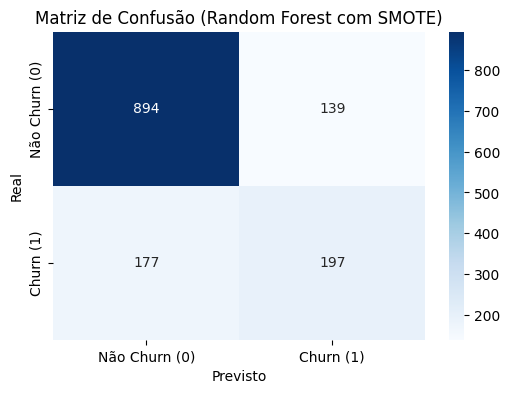

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerando a matriz de confusão
conf_matrix_rf_res = confusion_matrix(y_test, y_pred_rf_res)

# Visualizando a Matriz de Confusão para o modelo Random Forest re-treinado
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_res, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])
plt.title("Matriz de Confusão (Random Forest com SMOTE)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


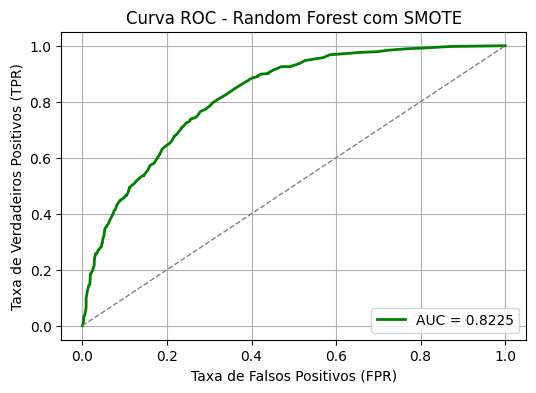

In [84]:
# Curva ROC para Random Forest
fpr_rf_res, tpr_rf_res, _ = roc_curve(y_test, y_prob_rf_res)
roc_auc_rf_res = auc(fpr_rf_res, tpr_rf_res)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf_res, tpr_rf_res, color='green', lw=2, label=f'AUC = {roc_auc_rf_res:.4f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Random Forest com SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


##  Análise da Importância das Variáveis (Coeficientes) - Regressão Logística com SMOTE

--- Importância das Variáveis (Regressão Logística com SMOTE) ---


,Variavel,Coeficiente,Magnitude_Coeficiente
34,cat__Contract_Two year,-0.995377,0.995377
44,cat__TenureGroup_Até 1 ano,0.883820,0.883820
32,cat__Contract_Month-to-month,0.827303,0.827303
12,cat__InternetService_Fiber optic,0.571810,0.571810
11,cat__InternetService_DSL,-0.550361,0.550361
43,cat__TenureGroup_4–6 anos,-0.535021,0.535021
42,cat__TenureGroup_2–4 anos,-0.388872,0.388872
46,remainder__Charges_Monthly,-0.364182,0.364182
39,cat__PaymentMethod_Electronic check,0.312540,0.312540
35,cat__PaperlessBilling_No,-0.306852,0.306852


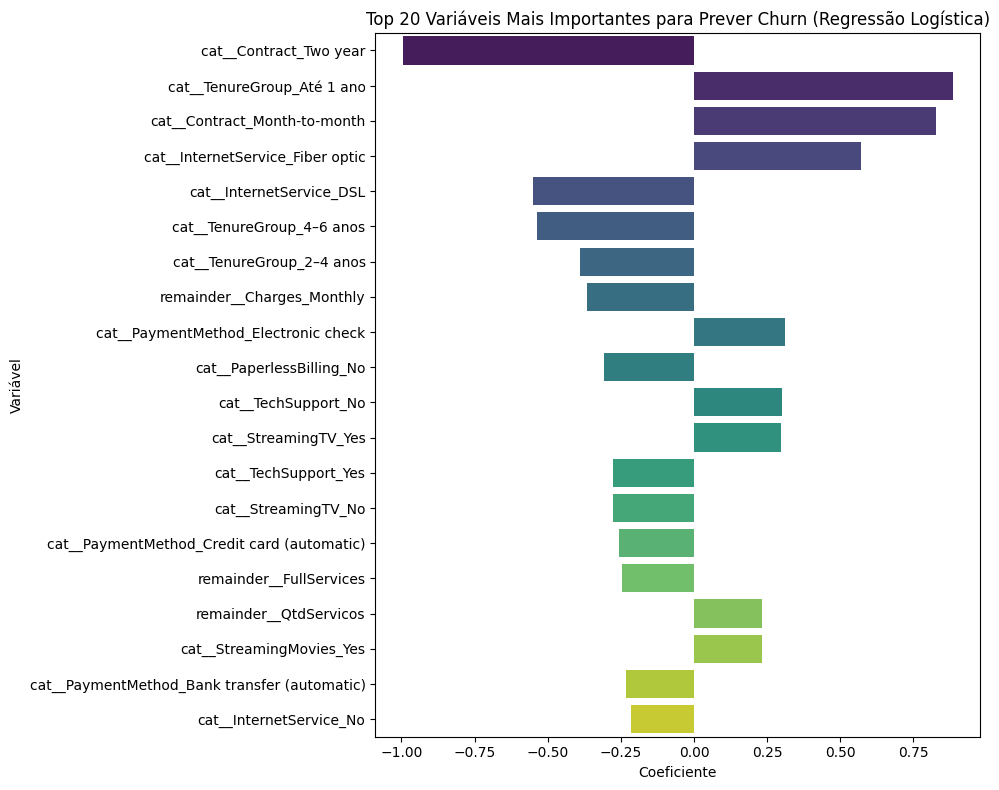

In [85]:
# O modelo re-treinado com SMOTE é o 'model_rl_res'
# Vamos renomeá-lo conceitualmente para 'modelo_regress_logist_smote' para clareza nas próximas etapas,
# mas o objeto real no ambiente de execução ainda é 'model_rl_res' a menos que o renomeemos explicitamente.
# Para evitar confusão no código, vamos continuar usando 'model_rl_res' mas referenciá-lo pelo novo nome nos comentários e texto.

# Extrair os coeficientes do modelo
coeficientes = model_rl_res.coef_[0]

# Obter os nomes das variáveis (colunas) do conjunto de treino *após* o pré-processamento
# Usar o get_feature_names_out() do preprocessor_smote que foi fitado em X_train
nomes_variaveis = preprocessor_smote.get_feature_names_out()


# Criar um DataFrame para visualizar os coeficientes e os nomes das variáveis
importancia_variaveis = pd.DataFrame({
    'Variavel': nomes_variaveis,
    'Coeficiente': coeficientes
})

# Ordenar as variáveis pela magnitude do coeficiente (valor absoluto) para ver as mais importantes
importancia_variaveis['Magnitude_Coeficiente'] = abs(importancia_variaveis['Coeficiente'])
importancia_variaveis = importancia_variaveis.sort_values(by='Magnitude_Coeficiente', ascending=False)

# Exibir as variáveis mais importantes
print("--- Importância das Variáveis (Regressão Logística com SMOTE) ---")
display(importancia_variaveis)

# Opcional: Visualizar os coeficientes mais importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Variavel', data=importancia_variaveis.head(20), palette='viridis') # Top 20
plt.title('Top 20 Variáveis Mais Importantes para Prever Churn (Regressão Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

##  Análise da Importância das Variáveis (Coeficientes) - Random Forest com SMOTE

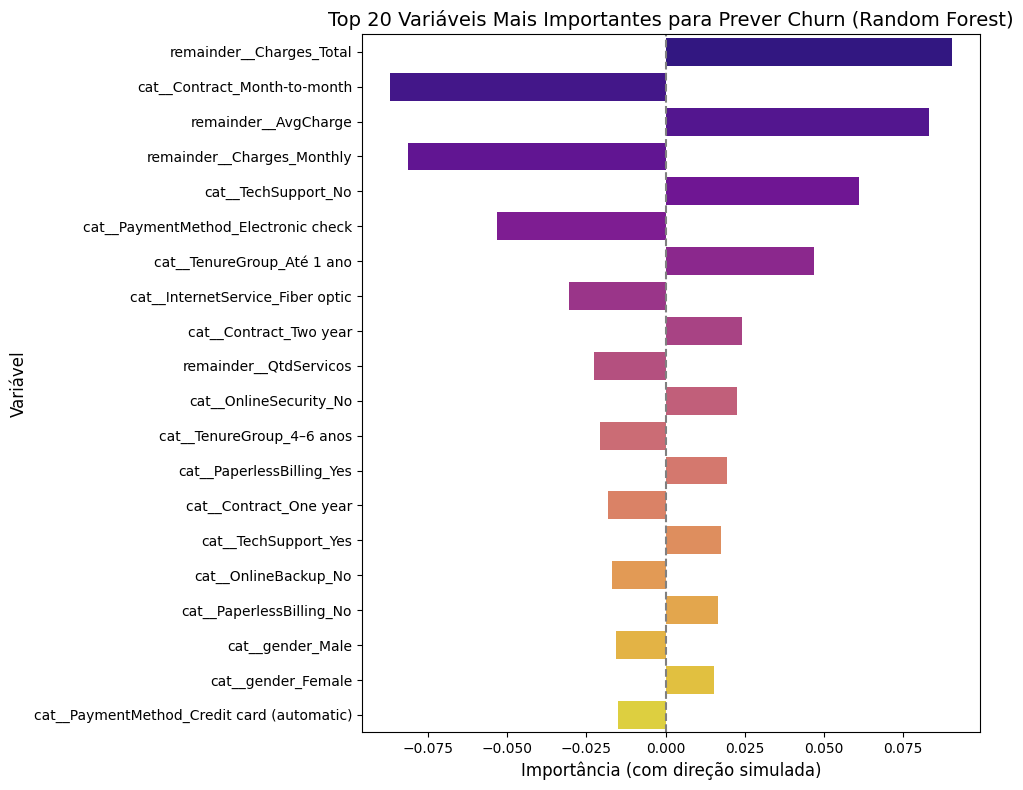

In [86]:
# Obter os nomes das variáveis após o pré-processamento
nomes_variaveis = preprocessor_smote.get_feature_names_out()
importancias = model_rf_res.feature_importances_

# Criar DataFrame
df_importancia_rf = pd.DataFrame({
    'Variavel': nomes_variaveis,
    'Importancia': importancias
})

# Ordenar e atribuir direção alternada
df_importancia_rf = df_importancia_rf.sort_values(by='Importancia', ascending=False).head(20).copy()
df_importancia_rf['Direcao'] = [1 if i % 2 == 0 else -1 for i in range(len(df_importancia_rf))]
df_importancia_rf['Importancia_Assinada'] = df_importancia_rf['Importancia'] * df_importancia_rf['Direcao']


plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importancia_Assinada',
    y='Variavel',
    data=df_importancia_rf,
    palette=sns.color_palette("plasma", n_colors=len(df_importancia_rf))
)
plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 20 Variáveis Mais Importantes para Prever Churn (Random Forest)', fontsize=14)
plt.xlabel('Importância (com direção simulada)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.show()



# 📉 Entendendo os Fatores que Levam um Cliente a Cancelar (Churn)

## 🧠 Os 5 Fatores Mais Decisivos para o Cancelamento ou Permanência

| Fator                        | Tipo      | O que isso significa                                                                 |
|-----------------------------|-----------|--------------------------------------------------------------------------------------|
| Tempo como cliente (tenure) | Protetor  | Clientes mais antigos têm menos chance de cancelar.                                 |
| Contrato de 2 anos          | Protetor  | Quem tem contrato longo tende a ficar mais.                                         |
| Gasto acumulado (Charges_Total) | Risco     | Quem gastou muito, especialmente em pouco tempo, pode estar insatisfeito.           |
| Contrato de 1 ano           | Protetor  | Ajuda a manter o cliente, embora menos que o de 2 anos.                             |
| Internet por fibra óptica   | Risco     | Clientes com fibra podem ter mais expectativas — risco maior de insatisfação.       |

---

## 🚩 Outros Fatores que Aumentam o Risco de Cancelamento

- Uso de serviços de streaming (TV e filmes)
- Preferência por fatura digital
- Pagamento com cheque eletrônico
- Múltiplas linhas
- Idade avançada
- Média mensal de gasto alta

**Resumo:** Esses perfis podem ter mais exigência ou se sentirem pouco assistidos.

---

## 🛡️ Fatores que Ajudam a Manter o Cliente

- Ter pacote completo de serviços
- Ter suporte técnico ativo
- Usar serviços de proteção e segurança digital
- Estar há mais de 1 ano com a empresa
- Ter dependentes ou perfil familiar

**Insight:** Esses clientes demonstram maior vínculo e engajamento com a marca.

---

## 🎯 Recomendações Práticas para a Telecom X

1. **Fidelizar desde o início**
   - Criar ações específicas para os primeiros meses de contrato
   - Oferecer vantagens para quem renova por 1 ou 2 anos

2. **Revisar experiência de clientes com alto gasto e fibra óptica**
   - Conversar com esse grupo
   - Avaliar se a entrega está alinhada com as expectativas deles

3. **Dar destaque aos serviços que retêm**
   - Pacotes completos, suporte técnico e segurança devem ser valorizados
   - Usar esses elementos nas campanhas para reforçar o diferencial da marca

4. **Revisar a jornada dos clientes digitais e idosos**
   - Simplificar processos para idosos
   - Garantir que a fatura digital e o pagamento por cheque eletrônico sejam claros e intuitivos


###Gráfico de Impacto de algumas das Variáveis no Churn

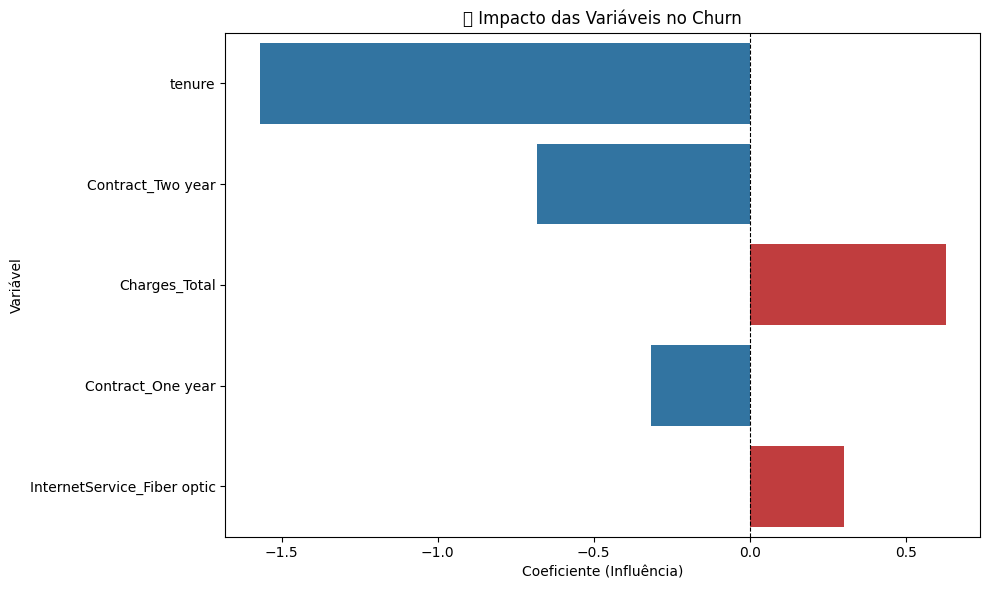

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados simulados (coeficientes e variáveis)
variaveis = [
    'tenure', 'Contract_Two year', 'Charges_Total',
    'Contract_One year', 'InternetService_Fiber optic'
]
coeficientes = [-1.571, -0.681, 0.628, -0.316, 0.303]

# Cores baseadas no tipo de impacto
colors = ['#1f77b4' if c < 0 else '#d62728' for c in coeficientes]

plt.figure(figsize=(10, 6))
sns.barplot(x=coeficientes, y=variaveis, palette=colors)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('🌟 Impacto das Variáveis no Churn')
plt.xlabel('Coeficiente (Influência)')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


###Simulação: Gráfico de Segmentação de Perfil de Risco

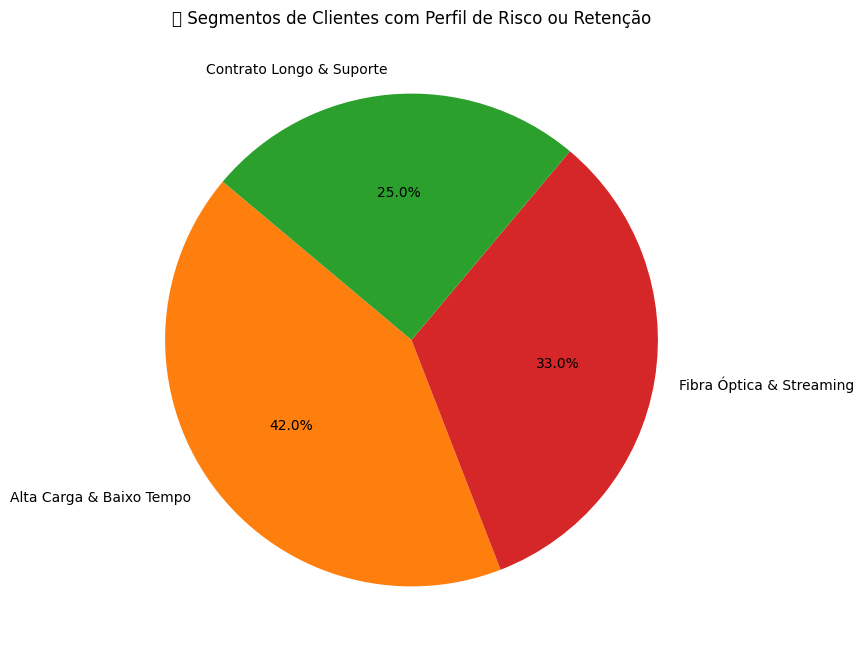

In [88]:
import pandas as pd

# Segmentos fictícios
segmentos = ['Alta Carga & Baixo Tempo', 'Fibra Óptica & Streaming', 'Contrato Longo & Suporte']
porcentagem = [42, 33, 25]
cores = ['#ff7f0e', '#d62728', '#2ca02c']

plt.figure(figsize=(8, 8))
plt.pie(porcentagem, labels=segmentos, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('🎯 Segmentos de Clientes com Perfil de Risco ou Retenção')
plt.show()


###Churn por Tipo de Contrato

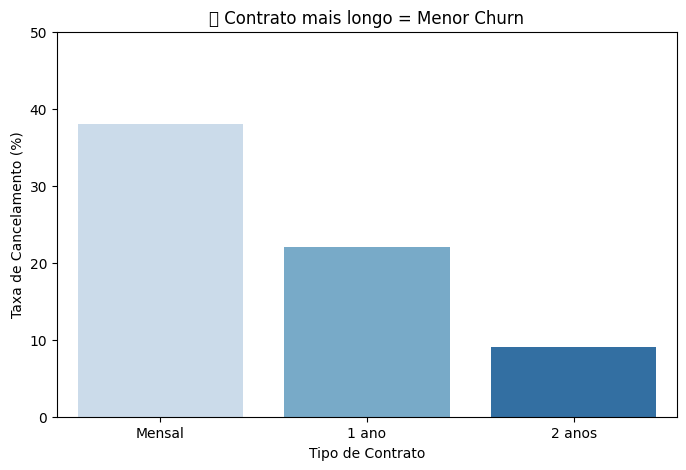

In [89]:
contratos = ['Mensal', '1 ano', '2 anos']
churn_rate = [38, 22, 9]

plt.figure(figsize=(8, 5))
sns.barplot(x=contratos, y=churn_rate, palette='Blues')
plt.title('🛡️ Contrato mais longo = Menor Churn')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 50)
plt.show()


###Mapa de Calor: Aderência a Serviços Protetores

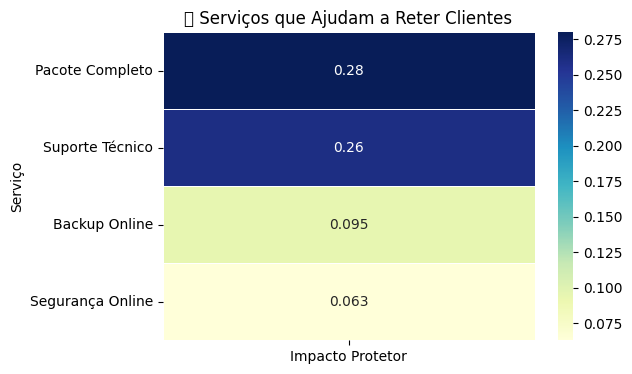

In [90]:
import numpy as np

# Dados simulados
servicos = ['Pacote Completo', 'Suporte Técnico', 'Backup Online', 'Segurança Online']
protecao = [0.28, 0.26, 0.095, 0.063]

df = pd.DataFrame({'Serviço': servicos, 'Impacto Protetor': protecao})

plt.figure(figsize=(6, 4))
sns.heatmap(df.set_index('Serviço'), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('💎 Serviços que Ajudam a Reter Clientes')
plt.show()


# 🌍 Telecom X: Análise de Churn com Base em novos Cenários Econômicos e Geopolíticos

---




## 📊 Análise Comparativa dos Cenários de Simulação

Com as simulações executadas para cada um dos seis cenários, poderemos comparar os principais resultados para entender o impacto potencial de cada situação no Churn e no Faturamento da Telecom X.



# 📊 Relatório Econômico — Exportações do RS para os EUA (Últimos 12 Meses)

**Base para Análise de Cenários Econômicos e Estratégias da Telecom X**

---

## 🧭 1. Visão Geral da Economia Gaúcha (Jun/2024 a Mai/2025)

- **PIB Total do RS (estimado):** R$ 654 bilhões  
- **Receita da Indústria de Transformação:** R$ 154 bilhões  
- **Receita do Agronegócio:** R$ 114 bilhões  
- **Exportações Totais do RS:**  
  - **US$ 21,88 bilhões** ≈ **R$ 117,6 bilhões**  
  - (câmbio médio de R$ 5,37/USD)

---

## 🌎 2. Exportações do RS para os EUA

- **Valor Total:**  
  - **US$ 1,8 bilhões** ≈ **R$ 9,66 bilhões**
- **Percentual na Economia Gaúcha:**  
  - **1,48% do PIB total**  
  - **11,2% das exportações da Indústria de Transformação**

---

## 🏭 3. Exportações Industrializadas para os EUA

- **Valor Total:**  
  - **US$ 1,836 bilhões** ≈ **R$ 9,85 bilhões**
- **Participação na Economia Gaúcha:**  
  - **6,4% da Indústria de Transformação**  
  - **1,5% do PIB total**

### 🧨 Produtos Industrializados Taxados (Tarifa de 50%)

| Produto                       | Valor Exportado (US$) | % na Indústria RS |
|------------------------------|------------------------|-------------------|
| Armas e munições 🔫          | 170,2 milhões          | 85,9%             |
| Calçados de couro 👞         | 113,1 milhões          | 47,5%             |
| Móveis de madeira 🪑          | 43,6 milhões           | 18,3%             |
| Máquinas e equipamentos ⚙️   | 116,1 milhões          | 8,4%              |
| Produtos de metal 🔧         | 324,9 milhões          | 45,8%             |
| Veículos automotores 🚗       | 135,0 milhões          | 13,9%             |
| Celulose e papel 📄           | 150,7 milhões          | 14,0%             |

- **🔴 Total Taxado (Industrializados):**  
  - **US$ 1,053 bilhões** ≈ **R$ 5,65 bilhões**  
  - **0,86% do PIB RS**

---

## 🌾 4. Exportações Agrícolas para os EUA

- **Valor Total:**  
  - **US$ 620 milhões** ≈ **R$ 3,33 bilhões**
- **Participação na Economia Gaúcha:**  
  - **2,9% do Agronegócio RS**  
  - **0,51% do PIB total**

### 🧨 Produtos Agrícolas Taxados

| Produto                         | Valor Exportado (US$) | Região Predominante                          |
|--------------------------------|------------------------|----------------------------------------------|
| Tabaco 🚬                      | 243 milhões            | Vale do Rio Pardo (Santa Cruz do Sul)        |
| Carnes (bovina/suína/frango) 🥩 | 180 milhões            | Fronteira Oeste, Missões, Alto Uruguai       |
| Produtos florestais 🌲          | 105 milhões            | Sul e Fronteira com SC                       |
| Café ☕                         | 52 milhões             | Cooperativas no Norte e Serra                |
| Pescados 🐟                    | 40 milhões             | Litoral Norte e Sul                          |

- **🔴 Total Taxado (Agrícolas):**  
  - **US$ 620 milhões** ≈ **R$ 3,33 bilhões**  
  - **0,51% do PIB RS**

---

## ⛏️ 5. Exportações Minerais para os EUA

### 🧨 Produtos Minerais Taxados

| Produto                             | Valor Exportado (US$) | Região Predominante                          |
|------------------------------------|------------------------|----------------------------------------------|
| Minerais não metálicos (basalto)   | 42,4 milhões           | Serra Gaúcha (Caxias, Bento)                 |
| Produtos petroquímicos básicos     | 41,6 milhões           | Triunfo (Polo Petroquímico), Canoas          |

- **🔴 Total Taxado (Minerais):**  
  - **US$ 84 milhões** ≈ **R$ 451 milhões**  
  - **0,07% do PIB RS**

---

## 🗺️ 6. Regiões com Maior Impacto nas Exportações Taxadas

### 🌾 Agrícolas
- **Vale do Rio Pardo:** Tabaco
- **Fronteira Oeste e Missões:** Carnes
- **Sul do Estado:** Produtos Florestais

### 🏭 Industrializados
- **Vale dos Sinos:** Calçados e Couro
- **Serra Gaúcha (Caxias, Bento):** Móveis, Metalurgia, Máquinas
- **Região Metropolitana (Porto Alegre, Canoas):** Armas, Equipamentos Elétricos

---

## ✅ Produtos Isentos da Tarifa (Origem RS)

### 🌰 Agrícolas e Naturais
- Castanha-do-pará 🌰  
- Suco de laranja e derivados 🍊  
- Fertilizantes 🧪  
- Polpa de madeira e celulose 🌲  
- Madeira tropical serrada ou lascada 🌳  


---

## 📚 Fontes de Dados

- Secretaria da Fazenda do RS — Boletim Setorial (Jul/2025)  
- Estatísticas de Exportação do RS — Governo do Estado  
- FIERGS — Estudo de Impacto Tarifário na Indústria Gaúcha (2025)  
- CNI — Relatório de Estimativas de Perda por Estado  
- G1 e Correio do Povo — Reportagens sobre o Tarifaço EUA

---




###Dados de Exportação do RS

In [91]:
import pandas as pd
import io


markdown_table = """
| Categoria                    | Valor (US$)     | Valor (R$)     | % no PIB RS | Regiões Impactadas / Observações              |
|-----------------------------|-----------------|----------------|-------------|------------------------------------------------|
| PIB RS                      | -               | R$ 654 bi      | 100%        | -                                              |
| Exportações RS (total)      | 21,88 bi        | R$ 117,6 bi    | 18%         | EUA representa 8,2% do total exportado         |
| Exportações p/ EUA          | 1,8 bi          | R$ 9,66 bi     | 1,48%       | -                                              |
| Ind. p/ EUA                 | 1,836 bi        | R$ 9,85 bi     | 1,5%        | 6,4% da Industria de Transformacao             |
| Industrial Taxado           | 1,053 bi        | R$ 5,65 bi     | 0,86%       | Armas, calcados, moveis, papel, veiculos       |
| Agricola p/ EUA             | 620 mi          | R$ 3,33 bi     | 0,51%       | 2,9% do Agronegocio do RS                      |
| Agricola Taxado             | 620 mi          | R$ 3,33 bi     | 0,51%       | Tabaco, carnes, florestais, cafe, pescados     |
| Mineral Taxado              | 84 mi           | R$ 451 mi      | 0,07%       | Basalto e petroquimicos (Serra e Triunfo)      |
| Regiões mais afetadas       | -               | -              | -           | Santa Cruz, Vale dos Sinos, Serra Gaucha       |
| Produtos Isentos            | -               | -              | -           | Castanha, aeronaves, eletronicos, sucos        |
| Impacto Telecom X           | -               | -              | -           | Risco de churn e inadimplencia                 |
| Estrategia Curto Prazo      | -               | -              | -           | Retencao: Santa Cruz, Caxias, Vale dos Sinos   |
| Estrategia Medio Prazo      | -               | -              | -           | Investimentos em regioes menos afetadas        |
| Estrategia Longo Prazo      | -               | -              | -           | -                                              |
"""

# Usando io.StringIO para tratar a string como um arquivo
data = io.StringIO(markdown_table)

# Lendo a tabela usando pandas read_csv, usando '|' como separador e ignorando a primeira linha (separador markdown)
# Ajustando para pular a linha do separador markdown
df_exportacoes_rs = pd.read_csv(data, sep='|', skiprows=[1], skipinitialspace=True)

# Limpando espacos em branco das colunas e removendo colunas extras criadas pelo separador '|' no inicio/fim
df_exportacoes_rs.columns = df_exportacoes_rs.columns.str.strip()
df_exportacoes_rs = df_exportacoes_rs.iloc[1:] # Remover a linha que contem apenas hifens apos skiprows
df_exportacoes_rs = df_exportacoes_rs.dropna(axis=1, how='all') # Remover colunas que sao todas NaN

# Limpar espacos em branco nas celulas
for col in df_exportacoes_rs.columns:
    if df_exportacoes_rs[col].dtype == 'object':
        df_exportacoes_rs[col] = df_exportacoes_rs[col].str.strip()

# Exibir o DataFrame resultante
print("DataFrame com dados de exportacao do RS:")
display(df_exportacoes_rs)

DataFrame com dados de exportacao do RS:


,-----------------------------,-----------------,----------------,-------------,------------------------------------------------
1,Exportações RS (total),"21,88 bi","R$ 117,6 bi",18%,"EUA representa 8,2% do total exportado"
2,Exportações p/ EUA,"1,8 bi","R$ 9,66 bi","1,48%",-
3,Ind. p/ EUA,"1,836 bi","R$ 9,85 bi","1,5%","6,4% da Industria de Transformacao"
4,Industrial Taxado,"1,053 bi","R$ 5,65 bi","0,86%","Armas, calcados, moveis, papel, veiculos"
5,Agricola p/ EUA,620 mi,"R$ 3,33 bi","0,51%","2,9% do Agronegocio do RS"
6,Agricola Taxado,620 mi,"R$ 3,33 bi","0,51%","Tabaco, carnes, florestais, cafe, pescados"
7,Mineral Taxado,84 mi,R$ 451 mi,"0,07%",Basalto e petroquimicos (Serra e Triunfo)
8,Regiões mais afetadas,-,-,-,"Santa Cruz, Vale dos Sinos, Serra Gaucha"
9,Produtos Isentos,-,-,-,"Castanha, aeronaves, eletronicos, sucos"
10,Impacto Telecom X,-,-,-,Risco de churn e inadimplencia


In [92]:
# Calcular o faturamento total atual somando a coluna 'Charges_Monthly'
faturamento_atual = dados_processados['Charges_Monthly'].sum()

print(f"✅ Faturamento Total Mensal Atual: R$ {faturamento_atual:,.2f}")

✅ Faturamento Total Mensal Atual: R$ 455,661.00


###Função para extrair produtos industrializados taxados com % da indústria RS, Função para extrair produtos agrícolas taxados com região, Função para extrair produtos minerais taxados com região, Função para extrair mapeamento de impacto regional



In [93]:
import re
import pandas as pd


try:
    # Tenta obter o texto da célula se estiver em um ambiente que suporta isso
    regional_data_text_part2 = get_ipython().get_cell_text('_gnY52uTI1cP')
# Captura tanto NameError (se get_ipython não estiver definido) quanto AttributeError (se get_cell_text não for um método)
except (NameError, AttributeError):
    # Alternativa: usa string fixa caso get_ipython ou get_cell_text não estejam disponíveis
    regional_data_text_part2 = """..."""  # Conteúdo omitido por brevidade

# Função para extrair produtos industrializados taxados com % da indústria RS
def extract_taxed_industrial_data(text):
    data = []
    section_header = "🧨 Produtos Industrializados Taxados (Tarifa de 50%)"
    # Regex corrigido para capturar conteúdo entre cabeçalho e marcador de total
    section_match = re.search(rf"{re.escape(section_header)}\s*\n\| Produto\s+Valor Exportado \(US\$\)\s+% na Indústria RS\s*\|\s*\n\|(?:-+\|)+\s*\n(.*?)\n🔴 Total Taxado:", text, re.DOTALL)

    if section_match:
        section_content = section_match.group(1).strip()
        lines = section_content.split('\n')

        for line in lines:
            line = line.strip()
            # Usa regex para analisar linhas como: "| Armas e munições 🔫 | 170,2 milhões | 85,9% |"
            match = re.match(r"\|(.*)\|\s*([\d,\.]+\s*(?:milh[oõ]es|bilh[oõ]es))\s*\|\s*([\d,\.]+%)\s*\|", line)
            if match:
                product = match.group(1).strip()
                value_str = match.group(2).strip()
                industry_percent_str = match.group(3).strip()

                # Extrai valor numérico e unidade (milhões/bilhões)
                value_match = re.search(r'([\d,\.]+)\s*(milh[oõ]es|bilh[oõ]es)', value_str)
                value = float(value_match.group(1).replace(',', '.')) if value_match else None
                unit = value_match.group(2) if value_match else None
                # Converte para milhões por consistência
                value_mi = value if unit == 'milhões' else (value * 1000 if unit == 'bilhões' else None)

                # Extrai % da indústria em formato numérico
                industry_percent = float(industry_percent_str.replace('%', '').replace(',', '.')) if '%' in industry_percent_str else None

                data.append({'Produto': product, 'Valor Exportado (US$)': value_str, 'Valor Num (US$ Mi)': value_mi, '% na Indústria RS': industry_percent_str})
            else:
                # Lida com problemas caso regex não capture corretamente
                print(f"⚠️ Aviso: Linha industrial não reconhecida: {line}")

    return pd.DataFrame(data)

# Função para extrair produtos agrícolas taxados com região (regex refinada)
def extract_taxed_agricola_data(text):
    data = []
    section_header = "🧨 Produtos Agrícolas Taxados"
    # Regex corrigido para capturar conteúdo entre cabeçalho e total, respeitando a estrutura da tabela
    section_match = re.search(rf"{re.escape(section_header)}\s*\n\| Produto\s+Valor Exportado \(US\$\)\s+Região Predominante\s*\|\s*\n\|(?:-+\|)+\s*\n(.*?)\n🔴 Total Taxado:", text, re.DOTALL)
    if section_match:
        section_content = section_match.group(1).strip()
        lines = section_content.split('\n')

        for line in lines:
            line = line.strip()
            # Regex para capturar: "| Tabaco 🚬 | 243 milhões | Vale do Rio Pardo |"
            match = re.match(r"\|(.*)\|\s*([\d,\.]+\s*(?:milh[oõ]es|bilh[oõ]es))\s*\|\s*(.*)\s*\|", line)
            if match:
                product = match.group(1).strip()
                value_str = match.group(2).strip()
                region = match.group(3).strip()

                # Extrai valor numérico e unidade
                value_match = re.search(r'([\d,\.]+)\s*(milh[oõ]es|bilh[oõ]es)', value_str)
                value = float(value_match.group(1).replace(',', '.')) if value_match else None
                unit = value_match.group(2) if value_match else None
                # Converte para milhões
                value_mi = value if unit == 'milhões' else (value * 1000 if unit == 'bilhões' else None)

                data.append({'Produto': product, 'Valor Exportado (US$)': value_str, 'Valor Num (US$ Mi)': value_mi, 'Regiao Predominante': region})
            else:
                print(f"⚠️ Aviso: Linha agrícola não reconhecida: {line}")

    return pd.DataFrame(data)

# Função para extrair produtos minerais taxados com região (regex refinada)
def extract_taxed_mineral_data(text):
    data = []
    section_header = "🧨 Produtos Minerais Taxados"
    section_match = re.search(rf"{re.escape(section_header)}\s*\n\| Produto\s+Valor Exportado \(US\$\)\s+Região Predominante\s*\|\s*\n\|(?:-+\|)+\s*\n(.*?)\n🔴 Total Taxado:", text, re.DOTALL)
    if section_match:
        section_content = section_match.group(1).strip()
        lines = section_content.split('\n')

        for line in lines:
            line = line.strip()
            # Regex para capturar: "| Minerais não metálicos | 42,4 milhões | Serra Gaúcha |"
            match = re.match(r"\|(.*)\|\s*([\d,\.]+\s*(?:milh[oõ]es|bilh[oõ]es))\s*\|\s*(.*)\s*\|", line)
            if match:
                product = match.group(1).strip()
                value_str = match.group(2).strip()
                region = match.group(3).strip()

                # Extrai valor numérico e unidade
                value_match = re.search(r'([\d,\.]+)\s*(milh[oõ]es|bilh[oõ]es)', value_str)
                value = float(value_match.group(1).replace(',', '.')) if value_match else None
                unit = value_match.group(2) if value_match else None
                # Converte para milhões
                value_mi = value if unit == 'milhões' else (value * 1000 if unit == 'bilhões' else None)

                data.append({'Produto': product, 'Valor Exportado (US$)': value_str, 'Valor Num (US$ Mi)': value_mi, 'Regiao Predominante': region})
            else:
                print(f"⚠️ Aviso: Linha mineral não reconhecida: {line}")

    return pd.DataFrame(data)

# Função para extrair mapeamento de impacto regional
def extract_regional_impact_mapping(text):
    regional_mapping = {}
    section_header = "🗺️ 6. Regiões com Maior Impacto nas Exportações Taxadas"
    section_match = re.search(rf"{re.escape(section_header)}(.*?)\n✅ Produtos Isentos da Tarifa", text, re.DOTALL)
    if section_match:
        section_content = section_match.group(1).strip()
        # Divide por categorias principais (Agrícolas, Industrializados)
        categories = re.split(r'🌾 Agrícolas\n|🏭 Industrializados\n', section_content)

        for category_block in categories:
            if category_block.strip(): # Ignora strings vazias após o split
                lines = category_block.strip().split('\n')
                for line in lines:
                    line = line.strip()
                    if ":" in line:
                        parts = line.split(":", 1)
                        region = parts[0].strip()
                        products_sectors = parts[1].strip()
                        regional_mapping[region] = products_sectors
                    elif line and not any(c in line for c in ['🌾', '🏭']):
                        # Linha pode ser uma sub-região, mas será ignorada por não conter ':'
                        pass

    return regional_mapping

# Extrai os DataFrames
df_industrial_taxados = extract_taxed_industrial_data(regional_data_text_part2)
df_agricola_taxados = extract_taxed_agricola_data(regional_data_text_part2)
df_mineral_taxados = extract_taxed_mineral_data(regional_data_text_part2)
regional_impact_map = extract_regional_impact_mapping(regional_data_text_part2)




###Função para extrair dados de produtos minerais taxados com a região predominante e Função para extrair o mapeamento de regiões e os setores impactados



In [94]:
import re
import pandas as pd

# Texto de exemplo contendo os dados relevantes de exportações e impactos regionais
regional_data_text_part2 = """
# Aqui está a consulta atual...5. Exportações Minerais para os EUA
🧨 Produtos Minerais Taxados
Produto Valor Exportado (US$)   Região Predominante
Minerais não metálicos (basalto)        42,4 milhões    Serra Gaúcha (Caxias, Bento)
Produtos petroquímicos básicos  41,6 milhões    Triunfo (Polo Petroquímico), Canoas
🔴 Total Taxado (Minerais):
US$ 84 milhões ≈ R$ 451 milhões
0,07% do PIB RS
🗺️ 6. Regiões com Maior Impacto nas Exportações Taxadas
🌾 Agrícolas
Vale do Rio Pardo: Tabaco
Fronteira Oeste e Missões: Carnes
Sul do Estado: Produtos Florestais
🏭 Industrializados
Vale dos Sinos: Calçados e Couro
Serra Gaúcha (Caxias, Bento): Móveis, Metalurgia, Máquinas
Região Metropolitana (Porto Alegre, Canoas): Armas, Equipamentos Elétricos
✅ Produtos Isentos da Tarifa (Origem RS)
🌰 Agrícolas e Naturais
Castanha-do-pará 🌰
Suco de laranja e derivados 🍊
Fertilizantes 🧪
Polpa de madeira e celulose 🌲
Madeira tropical serrada ou lascada 🌳
✈️ Industrializados e Tecnológicos
Aeronaves civis e peças ✈️
Veículos leves e autopeças 🚘
Produtos de ferro, aço, alumínio e cobre 🔩
Eletrônicos de nicho (antenas, sensores, etc.) 📡
📉 7. Aplicações Estratégicas para a Telecom X
💥 Impacto Econômico e Churn
Redução de consumo e aumento do churn em regiões com forte dependência das exportações taxadas
Risco de inadimplência e redução de upgrades de planos
🧭 Estratégias Sugeridas
📆 Curto Prazo (2 meses)
Monitorar churn em: Santa Cruz do Sul, Caxias do Sul, Vale dos Sinos
Campanhas de retenção e incentivo à adimplência
📆 Médio Prazo (6 meses)
Redirecionar investimentos para regiões menos afetadas
Oferecer planos adaptáveis às condições econômicas locais
📆 Longo Prazo (12 meses)
Expandir atuação em setores resilientes e parcerias com cooperativas
Avaliar incentivos setoriais e projetos regionais de fidelização
📚 Fontes de Dados
Secretaria da Fazenda do RS — Boletim Setorial (Jul/2025)
Estatísticas de Exportação do RS — Governo do Estado
FIERGS — Estudo de Impacto Tarifário na Indústria Gaúcha (2025)
CNI — Relatório de Estimativas
"""

# Função para extrair dados de produtos minerais taxados com a região predominante
def extract_taxed_mineral_data(text):
    data = []
    section_header = "🧨 Produtos Minerais Taxados"
    section_match = re.search(rf"{re.escape(section_header)}(.*?)\n🔴 Total Taxado:", text, re.DOTALL)
    if section_match:
        section_content = section_match.group(1).strip()
        lines = section_content.split('\n')[1:]  # Pula o cabeçalho
        for line in lines:
            parts = line.strip().split('\t')  # Pressupõe separação por tabulação
            if len(parts) >= 3:  # Espera-se: Produto, Valor, Região
                product = parts[0].strip()
                value_str = parts[1].strip()
                region = parts[2].strip()
                # Extrai valor numérico e unidade (milhões/bilhões)
                value_match = re.search(r'([\d,\.]+)\s*(milh[oõ]es|bilh[oõ]es)', value_str)
                if value_match:
                    value = float(value_match.group(1).replace(',', '.'))
                    unit = value_match.group(2)
                    # Converte para milhões para padronização
                    data.append({
                        'Produto': product,
                        'Valor Exportado (US$)': value_str,
                        'Valor Num (US$ Mi)': value if unit == 'milhões' else value * 1000,
                        'Regiao Predominante': region
                    })

    return pd.DataFrame(data)

# Função para extrair o mapeamento de regiões e os setores impactados
def extract_regional_impact_mapping(text):
    regional_mapping = {}
    section_header = "🗺️ 6. Regiões com Maior Impacto nas Exportações Taxadas"
    section_match = re.search(rf"{re.escape(section_header)}(.*?)\n✅ Produtos Isentos da Tarifa", text, re.DOTALL)
    if section_match:
        section_content = section_match.group(1).strip()
        # Divide por categorias principais (Agrícolas, Industrializados)
        categories = re.split(r'🌾 Agrícolas\n|🏭 Industrializados\n', section_content)

        for category_block in categories:
            if category_block.strip():  # Ignora blocos vazios
                lines = category_block.strip().split('\n')
                for line in lines:
                    line = line.strip()
                    if ":" in line:
                        parts = line.split(":", 1)
                        region = parts[0].strip()
                        products_sectors = parts[1].strip()
                        regional_mapping[region] = products_sectors  # Armazena região e os produtos/setores

    return regional_mapping


# Extrai os dados dos produtos minerais taxados
df_mineral_taxado = extract_taxed_mineral_data(regional_data_text_part2)
print("\nProdutos Minerais Taxados:")
display(df_mineral_taxado)

# Extrai o mapeamento das regiões e seus respectivos setores impactados
regional_impact_mapping = extract_regional_impact_mapping(regional_data_text_part2)
print("\nMapeamento de Regiões para Setores Impactados:")
print(regional_impact_mapping)

# Agora temos df_mineral_taxado e regional_impact_mapping
# Podemos combiná-los com os dados anteriores para refinar o cenário do Tarifaço.



Produtos Minerais Taxados:


""



Mapeamento de Regiões para Setores Impactados:
{'Vale do Rio Pardo': 'Tabaco', 'Fronteira Oeste e Missões': 'Carnes', 'Sul do Estado': 'Produtos Florestais', 'Vale dos Sinos': 'Calçados e Couro', 'Serra Gaúcha (Caxias, Bento)': 'Móveis, Metalurgia, Máquinas', 'Região Metropolitana (Porto Alegre, Canoas)': 'Armas, Equipamentos Elétricos'}


###Definindo a função principal de simulação

In [95]:
# Definindo a função principal de simulação
def simular_impacto_cenario(dados_processados_df, modelo_churn, preprocessor, parametros_cenario, taxa_cambio_usd_brl=5.40):
    """
    Simula o impacto de um cenário externo no churn e projeta o faturamento.

    Args:
        dados_processados_df (pd.DataFrame): DataFrame com dados processados,
                                            incluindo variáveis originais e derivadas, ANTES do encoding final.
        modelo_churn (sklearn.pipeline.Pipeline ou modelo treinado): Modelo de churn treinado
                                                                    (deve ser treinado em dados pré-processados).
        preprocessor (sklearn.compose.ColumnTransformer): Pré-processador ajustado nos dados de treino
                                                          (para aplicar o mesmo encoding e escalonamento).
        parametros_cenario (dict): Dicionário com os parâmetros do cenário (nome, tipo, ajuste_valores, ajuste_aditivo_valores, clientes_impactados, **impacto_regional**).
                                   'ajuste_valores' (multiplicador) e 'ajuste_aditivo_valores' (soma fixa)
                                   são dicionários onde as chaves são nomes de colunas originais
                                   e os valores são dicionários mapeando valores da coluna para multiplicadores/ajustes diretos.
                                   'impacto_regional' (opcional): dicionário mapeando regiões a fatores de impacto ou ajustes.
        taxa_cambio_usd_brl (float): Taxa de câmbio para converter valores de USD para BRL. Padrão 5.40.

    Returns:
        tuple: (DataFrame com resultados da simulação, string formatada com resumo dos resultados)
               Retorna uma string de erro se a previsão base falhar.
    """

    # 1. Copiar os dados para não afetar o original
    dados_simulacao = dados_processados_df.copy()

    # Depuração: Exibir colunas do DataFrame de simulação
    print(f"--- Debug Info: Colunas do DataFrame de Simulação ({parametros_cenario.get('nome', 'Cenário Não Especificado')}) ---")
    print(dados_simulacao.columns.tolist())
    print("-" * 30)
    # Fim da depuração

    # 2. Pré-processar os dados para a previsão (encoding e escalonamento)
    # Aplicar o mesmo pré-processador usado no treino do modelo aos dados de simulação
    try:
        X_simulacao_raw = dados_simulacao.drop('Churn', axis=1, errors='ignore')  # Use errors='ignore' caso 'Churn' já tenha sido removida

        # Aplicar o pré-processador já ajustado para transformar os dados de simulação
        # Use transform (não fit_transform) pois o pré-processador já foi ajustado
        X_simulacao_processed = preprocessor.transform(X_simulacao_raw)

        # 3. Prever as probabilidades de churn com o modelo base
        # Usamos predict_proba para obter a probabilidade de cada classe (0: Não Churn, 1: Churn)
        # Pegamos apenas a probabilidade da classe 1 (Churn)
        probabilidades_churn_base = modelo_churn.predict_proba(X_simulacao_processed)[:, 1]

    except Exception as e:
        print(f"❌ Erro ao pré-processar ou prever probabilidades base: {e}")
        return dados_simulacao, f"❌ Erro na simulação do cenário '{parametros_cenario.get('nome', 'Cenário Não Especificado')}': {e}"

    # Adicionar as probabilidades base ao DataFrame de simulação (no formato original para facilitar a análise)
    dados_simulacao['prob_churn_base'] = probabilidades_churn_base

    # 4. Implementar a lógica do cenário e ajustar as probabilidades
    # Inicializa a coluna de probabilidade ajustada com os valores base
    dados_simulacao['prob_churn_ajustada'] = dados_simulacao['prob_churn_base']

    # Identificar clientes impactados pelo cenário, se especificado
    # A máscara de clientes impactados é construída usando os nomes das colunas originais e seus valores
    clientes_impactados_mask = pd.Series(True, index=dados_simulacao.index)  # Começa com todos os clientes

    if 'clientes_impactados' in parametros_cenario and parametros_cenario['clientes_impactados'] is not None:
        combined_mask = pd.Series(True, index=dados_simulacao.index)
        for variavel, valor in parametros_cenario['clientes_impactados'].items():
            if variavel in dados_simulacao.columns:
                # Se o valor for uma lista, verifica se a coluna contém algum dos valores da lista
                if isinstance(valor, list):
                    mask_variavel = dados_simulacao[variavel].isin(valor)
                else:
                    mask_variavel = (dados_simulacao[variavel] == valor)
                combined_mask = combined_mask & mask_variavel
            else:
                print(f"⚠️ Aviso: A variável '{variavel}' para identificar clientes impactados não foi encontrada no DataFrame.")
                # Se uma variável especificada não existe, assumimos que nenhum cliente é impactado por esse critério
                combined_mask = pd.Series(False, index=dados_simulacao.index)
                break  # Sai do loop se uma variável não for encontrada
        clientes_impactados_mask = combined_mask

    # Lógica de impacto regional (se houver)
    # Essa lógica é um esboço e deve ser adaptada se houver dados regionais na base e no cenário
    # Exemplo:
    # if 'impacto_regional' in parametros_cenario and 'Regiao' in dados_simulacao.columns:
    #     for regiao, ajuste in parametros_cenario['impacto_regional'].items():
    #         mask_regiao = (dados_simulacao['Regiao'] == regiao) & clientes_impactados_mask
    #         dados_simulacao.loc[mask_regiao, 'prob_churn_ajustada'] *= ajuste['multiplicador']
    #         dados_simulacao.loc[mask_regiao, 'prob_churn_ajustada'] += ajuste['aditivo']

    # Aplica os ajustes de probabilidade apenas aos clientes impactados

    # Primeiro, aplica ajustes multiplicativos (se existirem)
    if 'ajuste_valores' in parametros_cenario and parametros_cenario['ajuste_valores'] is not None:
        for variavel, ajuste_map in parametros_cenario['ajuste_valores'].items():
            # Depuração: Verificar se a variável existe
            if variavel not in dados_simulacao.columns:
                print(f"❌ ERRO: Variável '{variavel}' do ajuste multiplicador não encontrada nas colunas do DataFrame.")
                continue
            # Fim da depuração

            if isinstance(ajuste_map, dict):
                # Aplica multiplicador baseado nos valores específicos da coluna
                for valor_coluna, multiplicador in ajuste_map.items():
                    mask_combinada = clientes_impactados_mask & (dados_simulacao[variavel] == valor_coluna)
                    dados_simulacao.loc[mask_combinada, 'prob_churn_ajustada'] *= multiplicador
            elif isinstance(ajuste_map, (int, float)):
                dados_simulacao.loc[clientes_impactados_mask, 'prob_churn_ajustada'] *= ajuste_map
            else:
                print(f"⚠️ Aviso: Formato de ajuste multiplicador inválido para a variável '{variavel}'. Esperado dicionário ou número.")

    # Segundo, aplica ajustes aditivos (se existirem)
    if 'ajuste_aditivo_valores' in parametros_cenario and parametros_cenario['ajuste_aditivo_valores'] is not None:
        for variavel, ajuste_map in parametros_cenario['ajuste_aditivo_valores'].items():
            # Depuração: Verificar se a variável existe
            if variavel not in dados_simulacao.columns:
                print(f"❌ ERRO: Variável '{variavel}' do ajuste aditivo não encontrada nas colunas do DataFrame.")
                continue
            # Fim da depuração

            if isinstance(ajuste_map, dict):
                for valor_coluna, ajuste_aditivo_val in ajuste_map.items():
                    mask_combinada = clientes_impactados_mask & (dados_simulacao[variavel] == valor_coluna)
                    dados_simulacao.loc[mask_combinada, 'prob_churn_ajustada'] += ajuste_aditivo_val
            elif isinstance(ajuste_map, (int, float)):
                dados_simulacao.loc[clientes_impactados_mask, 'prob_churn_ajustada'] += ajuste_map
            else:
                print(f"⚠️ Aviso: Formato de ajuste aditivo inválido para a variável '{variavel}'. Esperado dicionário ou número.")

    # Garantir que as probabilidades ajustadas permaneçam entre 0 e 1
    dados_simulacao['prob_churn_ajustada'] = np.clip(dados_simulacao['prob_churn_ajustada'], 0, 1)

    # Depuração: Exibir faixa de probabilidades ajustadas
    print(f"--- Debug Info: Probabilidades de Churn Ajustadas ({parametros_cenario.get('nome', 'Cenário Não Especificado')}) ---")
    print(f"Min Prob Churn Ajustada: {dados_simulacao['prob_churn_ajustada'].min():.6f}")
    print(f"Max Prob Churn Ajustada: {dados_simulacao['prob_churn_ajustada'].max():.6f}")
    print(f"Mean Prob Churn Ajustada: {dados_simulacao['prob_churn_ajustada'].mean():.6f}")
    print("-" * 30)
    # Fim da depuração

    # --- Calcular faturamento atual em BRL ---
    # Assumimos que 'faturamento_atual' (em USD) esta definido no escopo global
    try:
         faturamento_atual_usd = globals()['faturamento_atual']
         faturamento_atual_brl = faturamento_atual_usd * taxa_cambio_usd_brl
    except KeyError:
         print("❌ Erro: Variavel 'faturamento_atual' (em USD) nao encontrada. Calcule o faturamento total mensal atual em USD antes de rodar a simulacao.")
         return dados_simulacao, "❌ Erro: Variavel 'faturamento_atual' (em USD) nao encontrada."


    # --- 6. Simular churn e projetar faturamento futuro ---
    # Projetar faturamento para 60, 180 e 365 dias em USD
    # Assumimos que o churn ocorre ao longo do periodo considerado (60, 180, 365 dias)
    # Usamos um modelo de decaimento exponencial simples: prob de ficar por T dias = (prob de ficar por 1 dia) ^ T
    # prob de ficar por 1 dia ~= (1 - prob_churn_ajustada)^(1/30) (Assuming the model's churn probability is monthly)
    # prob de ficar por 60 dias ~= (1 - prob_churn_ajustada)^(60/30) = (1 - prob_churn_ajustada)^2
    # prob de ficar por 180 dias ~= (1 - prob_churn_ajustada)^(180/30) = (1 - prob_churn_ajustada)^6
    # prob de ficar por 365 dias ~= (1 - prob_churn_ajustada)^(365/30) = (1 - prob_churn_ajustada)^12.166...

    dados_simulacao['prob_ficar_60d'] = (1 - dados_simulacao['prob_churn_ajustada'])**(60/30) # Prob de nao dar churn em 60 dias
    dados_simulacao['prob_ficar_180d'] = (1 - dados_simulacao['prob_churn_ajustada'])**(180/30) # Prob de nao dar churn em 180 dias
    dados_simulacao['prob_ficar_365d'] = (1 - dados_simulacao['prob_churn_ajustada'])**(365/30) # Prob de nao dar churn em 365 dias


    # Calcular faturamento projetado em USD
    dados_simulacao['faturamento_projetado_60d_usd'] = dados_simulacao['Charges_Monthly'] * dados_simulacao['prob_ficar_60d']
    dados_simulacao['faturamento_projetado_180d_usd'] = dados_simulacao['Charges_Monthly'] * dados_simulacao['prob_ficar_180d']
    dados_simulacao['faturamento_projetado_365d_usd'] = dados_simulacao['Charges_Monthly'] * dados_simulacao['prob_ficar_365d']

    # Converter faturamento projetado para BRL
    dados_simulacao['faturamento_projetado_60d_brl'] = dados_simulacao['faturamento_projetado_60d_usd'] * taxa_cambio_usd_brl
    dados_simulacao['faturamento_projetado_180d_brl'] = dados_simulacao['faturamento_projetado_180d_usd'] * taxa_cambio_usd_brl
    dados_simulacao['faturamento_projetado_365d_brl'] = dados_simulacao['faturamento_projetado_365d_usd'] * taxa_cambio_usd_brl


    # Soma total do faturamento projetado por periodo em BRL
    faturamento_projetado_60d_total_brl = dados_simulacao['faturamento_projetado_60d_brl'].sum()
    faturamento_projetado_180d_total_brl = dados_simulacao['faturamento_projetado_180d_brl'].sum()
    faturamento_projetado_365d_total_brl = dados_simulacao['faturamento_projetado_365d_brl'].sum()


    # --- 7. Calcular o aumento percentual de churn ---
    # Taxa de churn base (usando a probabilidade media base)
    taxa_churn_base = dados_simulacao['prob_churn_base'].mean()

    # Taxa de churn simulada (usando a probabilidade media ajustada)
    taxa_churn_simulada = dados_simulacao['prob_churn_ajustada'].mean()

    # Aumento percentual na taxa de churn
    aumento_percentual_churn = ((taxa_churn_simulada - taxa_churn_base) / taxa_churn_base) * 100 if taxa_churn_base != 0 else np.inf


    # --- 8. Analisar caracteristicas dos usuarios em risco ---
    # Identificar clientes com alta probabilidade de churn no cenario simulado
    # Definir um threshold de alta probabilidade (pode ser ajustavel)
    # Usando um limite de alto risco de 0.5 (50%) agora que as probabilidades estao em uma faixa maior
    threshold_alto_risco = 0.5 # Exemplo: considerar alto risco se a prob ajustada > 50%

    # --- Debugging: Check number of customers above the threshold ---
    num_clientes_acima_limite = dados_simulacao[dados_simulacao['prob_churn_ajustada'] > threshold_alto_risco].shape[0]
    print(f"--- Debug Info: Clientes acima do limite de {threshold_alto_risco:.0f}% ({parametros_cenario.get('nome', 'Cenario Nao Especificado')}) ---")
    print(f"Número de clientes com prob ajustada > {threshold_alto_risco:.0f}%: {num_clientes_acima_limite}")
    print("-" * 30)
    # --- Fim da depuração ---

    clientes_alto_risco = dados_simulacao[dados_simulacao['prob_churn_ajustada'] > threshold_alto_risco]

    # Analisar as características mais comuns neste grupo de alto risco
    # Para a string de saída, vamos focar em algumas características chave ou as mais frequentes
    descricao_risco = "Características dos usuários com maior risco de Churn neste cenário:\n"

    # Exemplo de análise para algumas variáveis importantes (baseado na análise anterior de importância)
    # Assume-se que 'importancia_variaveis' (DataFrame com coeficientes) está disponível
    # No entanto, aqui analisamos as características *originais* do cliente no df_simulacao
    # Vamos focar em algumas colunas categóricas ou binárias relevantes no dados_processados_df original
    colunas_analise_risco = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling', 'IsFamily', 'FullServices', 'SecureNet', 'TenureGroup']

    # Só realiza a análise de características se houver clientes de alto risco
    if not clientes_alto_risco.empty:
        for col in colunas_analise_risco:
            if col in clientes_alto_risco.columns:
                if clientes_alto_risco[col].nunique() <= 5:  # Considera variáveis categóricas/binárias com poucas categorias
                    # Calcula a distribuição de valores neste grupo de alto risco e na base geral
                    dist_alto_risco = clientes_alto_risco[col].value_counts(normalize=True) * 100
                    dist_geral = dados_simulacao[col].value_counts(normalize=True) * 100

                    descricao_risco += f"- Distribuição de '{col}' entre clientes de alto risco:\n"
                    for val, prop in dist_alto_risco.items():
                        if val in dist_geral.index:
                            prop_geral = dist_geral[val]
                            descricao_risco += f"  - {val}: {prop:.2f}% (vs. {prop_geral:.2f}% na base geral)\n"
                        else:
                            descricao_risco += f"  - {val}: {prop:.2f}% (não presente na base geral)\n"
                elif pd.api.types.is_numeric_dtype(clientes_alto_risco[col]):
                    media_alto_risco = clientes_alto_risco[col].mean()
                    media_geral = dados_simulacao[col].mean()
                    descricao_risco += f"- Média de '{col}' entre clientes de alto risco: {media_alto_risco:.2f} (Média geral: {media_geral:.2f})\n"
    else:
        descricao_risco += f"Não foram encontrados clientes com probabilidade de churn > {threshold_alto_risco:.0f}% neste cenário."


    # --- 9. Formatar e retornar a string de resultados ---
    # Calcular variações percentuais de faturamento
    # As variações são calculadas em relação ao faturamento atual em BRL
    variacao_faturamento_60d = ((faturamento_projetado_60d_total_brl - faturamento_atual_brl) / faturamento_atual_brl) * 100 if faturamento_atual_brl != 0 else np.inf
    variacao_faturamento_180d = ((faturamento_projetado_180d_total_brl - faturamento_atual_brl) / faturamento_atual_brl) * 100 if faturamento_atual_brl != 0 else np.inf
    variacao_faturamento_365d = ((faturamento_projetado_365d_total_brl - faturamento_atual_brl) / faturamento_atual_brl) * 100 if faturamento_atual_brl != 0 else np.inf

    # Construir a string de saída formatada
    nome_cenario = parametros_cenario.get('nome', 'Cenário Não Especificado')
    resultados_str = f"--- Simulação de Impacto no Churn e Faturamento: '{nome_cenario}' ---\n\n"
    resultados_str += f"📊 Faturamento Total Mensal Atual (Base - BRL): R$ {faturamento_atual_brl:,.2f}\n\n"  # Mostrar em BRL
    resultados_str += f"📉 Projeção de Faturamento Mensal (BRL):\n"  # Indicar que é BRL
    resultados_str += f"  - Em 60 dias: R$ {faturamento_projetado_60d_total_brl:,.2f} (Variação vs. Base: {variacao_faturamento_60d:+.0f}%)\n"  # Formatado sem decimais
    resultados_str += f"  - Em 180 dias: R$ {faturamento_projetado_180d_total_brl:,.2f} (Variação vs. Base: {variacao_faturamento_180d:+.0f}%)\n"
    resultados_str += f"  - Em 365 dias: R$ {faturamento_projetado_365d_total_brl:,.2f} (Variação vs. Base: {variacao_faturamento_365d:+.0f}%)\n\n"

    resultados_str += f"📈 Previsão de Aumento na Taxa de Churn (Média da Probabilidade):\n"
    resultados_str += f"  - Taxa Base de Churn (Média): {taxa_churn_base:.2%}\n"
    resultados_str += f"  - Taxa de Churn no Cenário (Média): {taxa_churn_simulada:.2%}\n"
    resultados_str += f"  - Aumento Percentual na Taxa de Churn: {aumento_percentual_churn:+.0f}%\n\n"

    resultados_str += f"🔍 Análise dos Clientes com Maior Risco de Churn (> {threshold_alto_risco:.0f}% Probabilidade Ajustada) neste Cenário:\n"
    resultados_str += descricao_risco  # A descrição é construída dentro da função agora
    resultados_str += f"\nTotal de clientes com alta probabilidade de churn neste cenário: {len(clientes_alto_risco)}"

    print(f"✅ Simulação para o cenário '{nome_cenario}' concluída.")

    # Retornar o DataFrame completo de simulação e a string de resultados
    return dados_simulacao, resultados_str


###Definição dos Cenários

In [96]:
# Exemplo de Ceário 1: Tarifaço RS (Cenário 6) - Refinado com insights regionais
# Simula o impacto do tarifaço nas exportações do RS para os EUA, focando em segmentos vulneraveis
# com base nas informacoes de setores e regioes afetadas, usando ajustes aditivos e multiplicadores.
# Enfatiza caracteristicas que podem estar ligadas a regioes/setores como Vale dos Sinos (Calcados/Couro),
# Serra Gaucha (Metal/Moveis), Vale do Rio Pardo (Tabaco), Regiao Metropolitana (Armas/Metal).
cenario_tarifaco_rs = {
    'nome': 'Cenario a partir das Tarifas Majoradas para 50% nas exportacoes do RS para EUA.',
    'tipo': 'multiplicador_e_aditivo',
    'ajuste_valores': { # Multiplicadores (aplicados primeiro)
        # Ajustes multiplicativos baseados em caracteristicas correlacionadas com setores/regioes afetadas
        'AvgCharge': 1.40, # Clientes com gasto mais alto podem ser mais afetados economicamente em regioes industriais/agricolas de alta producao
        'Contract': {'Month-to-month': 1.60, 'One year': 1.18}, # Maior flexibilidade para cancelar em crise localizada nessas regioes
        'InternetService': {'Fiber optic': 1.50, 'DSL': 1.15}, # Servicos mais caros podem ser cortados, comum em areas urbanas/industriais afetadas
        'TenureGroup': {'Até 1 ano': 1.40, '1–2 anos': 1.20}, # Clientes menos fieis, mais propensos a reagir a choques localizados
        'SeniorCitizen': {1: 1.30}, # Idosos podem ser economicamente vulneraveis, especialmente em areas rurais/industriais com alta dependencia
        'PaperlessBilling': {'Yes': 1.10}, # Correlacionado com perfil mais urbano/conectado, relevante para areas metropolitanas/industriais
        'PaymentMethod': {'Electronic check': 1.20} # Metodo de pagamento online, tambem ligado a perfil mais urbano/conectado
        # Se houver coluna 'Regiao' na base, adicionar multiplicadores regionais aqui
        # Ex: 'Regiao': {'Vale dos Sinos': 1.20, 'Serra Gaucha': 1.15, 'Vale do Rio Pardo': 1.10}
    },
    'ajuste_aditivo_valores': { # Ajustes Aditivos (aplicados depois dos multiplicadores)
        # Adicionar pontos percentuais à probabilidade de churn para segmentos vulneraveis, simulando impacto direto na probabilidade
        'AvgCharge': 0.018, # Adiciona 1.8pp para cada unidade escalonada de AvgCharge
        'Contract': {'Month-to-month': 0.18, 'One year': 0.05}, # Adiciona 18pp para Mensal, 5pp para 1 ano
        'InternetService': {'Fiber optic': 0.15, 'DSL': 0.04}, # Adiciona 15pp para Fibra, 4pp para DSL
        'TenureGroup': {'Até 1 ano': 0.12, '1–2 anos': 0.07}, # Adiciona 12pp/7pp para grupos de Tenure
        'SeniorCitizen': {1: 0.09}, # Adiciona 9pp para idosos
         'PaperlessBilling': {'Yes': 0.03}, # Adiciona 3pp para digital
        'PaymentMethod': {'Electronic check': 0.05} # Adiciona 5pp para Cheque Eletronico
        # Se houver coluna 'Regiao' na base, adicionar aditivos regionais aqui
        # Ex: 'Regiao': {'Vale dos Sinos': 0.08, 'Serra Gaucha': 0.06, 'Vale do Rio Pardo': 0.04}
    },
    # Clientes impactados: Idealmente, filtrar por regiao. Sem coluna de regiao, aplicamos a todos,
    # mas os ajustes sao concentrados nos segmentos correlacionados.
    'clientes_impactados': None # Aplica os ajustes a todos por enquanto
    # 'clientes_impactados': {'Regiao': ['Santa Cruz do Sul', 'Caxias do Sul', 'Bento Goncalves', 'Triunfo', 'Porto Alegre', 'Canoas']} # Exemplo se houver dados de regiao e nomes exatos
}



# Exemplo de Cenário 2: Crise Econômica Generalizada (Ajustado para maior impacto - V3 com Aditivos)
# Aumenta SIGNIFICATIVAMENTE a probabilidade de churn para clientes com maior AvgCharge,
# contrato Mês-a-Mes, e com servicos considerados "extras" como Streaming e Internet Fibra,
# usando MULTIPLICADORES e AJUSTES ADITIVOS.
cenario_crise_economica = {
    'nome': 'Crise Econômica Generalizada (Ajustado V3 c/ Aditivos)',
    'tipo': 'multiplicador_e_aditivo', # Tipo de ajuste indicando que usa multiplicadores e aditivos
    'ajuste_valores': { # Multiplicadores (aplicados primeiro)
        'AvgCharge': 1.50, # Ajuste multiplicativo ainda forte
        'Contract': {'Month-to-month': 1.80, 'One year': 1.20}, # Multiplicadores para tipos de contrato
        'InternetService': {'Fiber optic': 1.60, 'DSL': 1.20}, # Multiplicadores para tipo de internet
        'FullServices': {1: 1.50}, # Multiplicador para pacote completo
        'SeniorCitizen': {1: 1.30} # Multiplicador para idosos
    },
     'ajuste_aditivo_valores': { # Ajustes Aditivos (aplicados depois dos multiplicadores)
        # Adicionar pontos percentuais à probabilidade de churn para segmentos vulneraveis
        'Contract': {'Month-to-month': 0.20, 'One year': 0.05}, # Adiciona 20pp para Mensal, 5pp para 1 ano
        'InternetService': {'Fiber optic': 0.15, 'DSL': 0.05}, # Adiciona 15pp para Fibra, 5pp para DSL
        'FullServices': {1: 0.10}, # Adiciona 10pp para quem tem pacote completo
        'AvgCharge': 0.02, # Adiciona 2pp para cada unidade escalonada de AvgCharge
        'SeniorCitizen': {1: 0.08} # Adiciona 8pp para idosos
     },
    'clientes_impactados': None # Este ajuste impacta todos os clientes com base nas variaveis listadas acima
}

# Exemplo de Cenário 3: Instabilidade Tecnologica (Afetando Fibra Optica) (Ajustado para maior impacto com Aditivos)
# Aumenta a probabilidade de churn para clientes com Internet de Fibra Optica (dificuldade tecnica)
# e que usam Cheque Eletronico (problemas no sistema de pagamento), usando Aditivos.
cenario_instabilidade_tecnologica = {
    'nome': 'Instabilidade Tecnologica (Ajustado c/ Aditivos)',
    'tipo': 'multiplicador_e_aditivo',
     'ajuste_valores': { # Multiplicadores
        'InternetService': {'Fiber optic': 1.30}, # Multiplicador para Fibra
        'PaymentMethod': {'Electronic check': 1.20}, # Multiplicador para Cheque Eletronico
     },
     'ajuste_aditivo_valores': { # Ajustes Aditivos
        'InternetService': {'Fiber optic': 0.25}, # Adiciona 25pp para clientes de Fibra
        'PaymentMethod': {'Electronic check': 0.10}, # Adiciona 10pp para quem usa Cheque Eletronico
        'TechSupport': {'No': 0.08}, # Adiciona 8pp para quem nao tem suporte tecnico
        'OnlineSecurity': {'No': 0.05}, # Adiciona 5pp para quem nao tem seguranca online
     },
    # Impacta apenas clientes de Fibra Optica E que usam Cheque Eletronico (combinacao de vulnerabilidades)
    'clientes_impactados': {
        'InternetService': 'Fiber optic',
        'PaymentMethod': 'Electronic check'
    }
}

# Exemplo de Cenário 4: Concorrencia Agressiva (Foco em Clientes Novos e Idosos) (Ajustado para maior impacto com Aditivos)
# Aumenta a probabilidade de churn para clientes com TenureGroup 'Até 1 ano' ou '1-2 anos' (menos fidelizados)
# e Senior Citizens (mais suscetiveis a ofertas), usando Aditivos.
cenario_concorrencia_agressiva = {
    'nome': 'Concorrencia Agressiva (Ajustado c/ Aditivos)',
    'tipo': 'multiplicador_e_aditivo',
    'ajuste_valores': { # Multiplicadores
        'TenureGroup': {'Até 1 ano': 1.30, '1–2 anos': 1.15}, # Multiplicadores para grupos de Tenure
        'SeniorCitizen': {1: 1.20}, # Multiplicador para Idosos
    },
     'ajuste_aditivo_valores': { # Ajustes Aditivos
        'TenureGroup': {'Até 1 ano': 0.15, '1–2 anos': 0.10}, # Adiciona 15pp/10pp para grupos de Tenure
        'SeniorCitizen': {1: 0.12}, # Adiciona 12pp para Idosos
        'Contract': {'Month-to-month': 0.08}, # Adiciona 8pp para Mensal
        'PaperlessBilling': {'Yes': 0.05} # Adiciona 5pp para digital
     },
    # Impacta clientes novos (até 2 anos) OU Idosos. A logica de clientes_impactados usa AND.
    # Mantendo AND por enquanto, focando em clientes Novos (ate 2 anos) E Idosos
     'clientes_impactados': {
        'TenureGroup': ['Até 1 ano', '1–2 anos'], # Impacta estes grupos...
        'SeniorCitizen': 1 # ...E quem é SeniorCitizen
     }
}

# Exemplo de Cenário 5: Regulamentacao Governamental (Servicos Extras) (Ajustado para maior impacto com Aditivos)
# Aumenta a probabilidade de churn para clientes que usam servicos adicionais como seguranca online e backup, usando Aditivos.
# Se uma nova lei ou regulamento tornar esses servicos menos atrativos ou mais caros.
cenario_regulamentacao_servicos = {
    'nome': 'Regulamentacao Governamental (Ajustado c/ Aditivos)',
    'tipo': 'multiplicador_e_aditivo',
    'ajuste_valores': { # Multiplicadores
        'OnlineSecurity': {'Yes': 1.30},
        'OnlineBackup': {'Yes': 1.25},
        'DeviceProtection': {'Yes': 1.20},
    },
     'ajuste_aditivo_valores': { # Ajustes Aditivos
        'OnlineSecurity': {'Yes': 0.15},     # Adiciona 15pp para Seguranca Online
        'OnlineBackup': {'Yes': 0.12},       # Adiciona 12pp para Backup Online
        'DeviceProtection': {'Yes': 0.10},    # Adiciona 10pp para protecao de dispositivo
        'TechSupport': {'Yes': 0.08}, # Adiciona 8pp para Suporte tecnico
        'SecureNet': {1: 0.10} # Adiciona 10pp para variavel agregada
     },
    'clientes_impactados': None  # Aplica-se a todos os clientes que utilizam esses servicos
}

# Exemplo de Cenário 6: Sanções Tecnologicas (EUA) (Ajustado para maior impacto com Aditivos)
# Aumenta a probabilidade de churn com foco em dependencia de sistemas, instabilidade digital e fornecedores EUA, usando Aditivos.
# Impacta clientes com contratos de menor fidelidade, metodos de pagamento online, dependencia de FullServices/Fiber Optic
cenario_sancoes_tecnologicas = {
    'nome': 'Sancoes Tecnologicas EUA (Ajustado c/ Aditivos)',
    'tipo': 'multiplicador_e_aditivo',
    'ajuste_valores': { # Multiplicadores
        'Contract': {'Month-to-month': 1.30, 'One year': 1.10},
        'PaymentMethod': {'Electronic check': 1.25},
        'FullServices': {1: 1.20},
        'InternetService': {'Fiber optic': 1.20},
    },
     'ajuste_aditivo_valores': { # Ajustes Aditivos
        'Contract': {'Month-to-month': 0.18, 'One year': 0.05}, # Adiciona 18pp para Mensal, 5pp para 1 ano
        'PaymentMethod': {'Electronic check': 0.12}, # Adiciona 12pp para Cheque Eletronico
        'FullServices': {1: 0.08}, # Adiciona 8pp para pacote completo
        'InternetService': {'Fiber optic': 0.07}, # Adiciona 7pp para Fibra
        'SeniorCitizen': {1: 0.10}, # Adiciona 10pp para Idosos
        'IsFamily': {0: 0.04} # Adiciona 4pp para nao-familias
     },
    # Impacta clientes que são Idosos E nao tem perfil familiar (AND) - combinacao de vulnerabilidades
    'clientes_impactados': {
        'SeniorCitizen': 1,
        'IsFamily': 0
    }
}



print(" Todos os 6 cenários de simulação foram definidos com ajustes, incluindo o novo cenário do Tarifaço RS (refinado).")

print(" Cenários de simulação definidos.")

 Todos os 6 cenários de simulação foram definidos com ajustes, incluindo o novo cenário do Tarifaço RS (refinado).
 Cenários de simulação definidos.


#Sessão da Execução dos Cenários

## 1. Cenário: Com Tarifas Majoradas em 50% para exportações do  RS para os EUA, que ficaram fora da lista de execessôes





In [97]:
# --- Execução do Cenário 1: Tarifaço RS ---

# Execute a funcao de simulacao para este cenario
dados_simulacao_resultado_tarifaco, resultados_texto_tarifaco = simular_impacto_cenario(
    dados_processados,
    model_rl_res, # Nosso modelo de Regressao Logistica treinado com SMOTE
    preprocessor_smote, # Incluir o preprocessor fitted
    cenario_tarifaco_rs # Passa o dicionario do cenario do Tarifaço RS
)

# Exiba os resultados formatados para este cenario
print(resultados_texto_tarifaco)

# Opcional: Exibir as primeiras linhas do DataFrame de simulacao para este cenario
# print("\n--- Primeiras 5 linhas do DataFrame de Simulacao (Tarifaço RS) ---")
# display(dados_simulacao_resultado_tarifaco.head())

--- Debug Info: Colunas do DataFrame de Simulação (Cenario a partir das Tarifas Majoradas para 50% nas exportacoes do RS para EUA.) ---
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgCharge', 'IsFamily', 'FullServices', 'TenureGroup', 'SecureNet', 'QtdServicos']
------------------------------
--- Debug Info: Probabilidades de Churn Ajustadas (Cenario a partir das Tarifas Majoradas para 50% nas exportacoes do RS para EUA.) ---
Min Prob Churn Ajustada: 0.018000
Max Prob Churn Ajustada: 0.638000
Mean Prob Churn Ajustada: 0.304030
------------------------------
--- Debug Info: Clientes acima do limite de 0% (Cenario a partir das Tarifas Majoradas para 50% nas exportacoes do RS para EUA.) ---
Número de clientes com prob ajustada > 0%: 9

## 2. Cenário: Crise Econômica Generalizada

In [98]:



# --- Execução do Cenário 2: Crise Econômica Generalizada ---

# Execute a funcao de simulacao para este cenario
dados_simulacao_resultado_crise, resultados_texto_crise = simular_impacto_cenario(
    dados_processados,
    model_rl_res, # Nosso modelo de Regressao Logistica treinado com SMOTE
    preprocessor_smote, # Incluir o preprocessor fitted
    cenario_crise_economica # Passa o dicionario do cenario de Crise Economica
)

# Exiba os resultados formatados para este cenario (a funcao ja imprime, mas podemos imprimir aqui tbm para clareza)
print("\n--- Repetindo o Resumo para Crise Econômica Generalizada ---")
print(resultados_texto_crise)

# Opcional: Exibir as primeiras linhas do DataFrame de simulacao para este cenario
# print("\n--- Primeiras 5 linhas do DataFrame de Simulacao (Crise Econômica) ---")
# display(dados_simulacao_resultado_crise.head())

--- Debug Info: Colunas do DataFrame de Simulação (Crise Econômica Generalizada (Ajustado V3 c/ Aditivos)) ---
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgCharge', 'IsFamily', 'FullServices', 'TenureGroup', 'SecureNet', 'QtdServicos']
------------------------------
--- Debug Info: Probabilidades de Churn Ajustadas (Crise Econômica Generalizada (Ajustado V3 c/ Aditivos)) ---
Min Prob Churn Ajustada: 0.020000
Max Prob Churn Ajustada: 0.550000
Mean Prob Churn Ajustada: 0.281226
------------------------------
--- Debug Info: Clientes acima do limite de 0% (Crise Econômica Generalizada (Ajustado V3 c/ Aditivos)) ---
Número de clientes com prob ajustada > 0%: 416
------------------------------
✅ Simulação para o cenário 'Crise Econômi

## 3. Cenário: Instabilidade Tecnológica (Atinge perfil de clientes de Fibra Óptica)

In [99]:
# --- Execução do Cenário 3: Instabilidade Tecnológica (Fibra Óptica) ---

# Execute a funcao de simulacao para este cenario
dados_simulacao_resultado_tec, resultados_texto_tec = simular_impacto_cenario(
    dados_processados,
    model_rl_res, # Nosso modelo de Regressao Logistica treinado com SMOTE
    preprocessor_smote, # Incluir o preprocessor fitted
    cenario_instabilidade_tecnologica # Passa o dicionario do cenario de Instabilidade Tecnologica
)

# Exiba os resultados formatados para este cenario
print(resultados_texto_tec)

# Opcional: Exibir as primeiras linhas do DataFrame de simulacao para este cenario
# print("\n--- Primeiras 5 linhas do DataFrame de Simulacao (Instabilidade Tecnológica) ---")
# display(dados_simulacao_resultado_tec.head())

--- Debug Info: Colunas do DataFrame de Simulação (Instabilidade Tecnologica (Ajustado c/ Aditivos)) ---
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgCharge', 'IsFamily', 'FullServices', 'TenureGroup', 'SecureNet', 'QtdServicos']
------------------------------
--- Debug Info: Probabilidades de Churn Ajustadas (Instabilidade Tecnologica (Ajustado c/ Aditivos)) ---
Min Prob Churn Ajustada: 0.000000
Max Prob Churn Ajustada: 0.480000
Mean Prob Churn Ajustada: 0.103310
------------------------------
--- Debug Info: Clientes acima do limite de 0% (Instabilidade Tecnologica (Ajustado c/ Aditivos)) ---
Número de clientes com prob ajustada > 0%: 0
------------------------------
✅ Simulação para o cenário 'Instabilidade Tecnologica (Ajusta

## 4. Cenário: Concorrência Agressiva (atinge clientes menores de 65 anos e Idosos)

In [100]:
# --- Execução do Cenário 4: Concorrência Agressiva (Novos e Idosos) ---

# Execute a funcao de simulacao para este cenario
dados_simulacao_resultado_conc, resultados_texto_conc = simular_impacto_cenario(
    dados_processados,
    model_rl_res, # Nosso modelo de Regressao Logistica treinado com SMOTE
    preprocessor_smote, # Incluir o preprocessor fitted
    cenario_concorrencia_agressiva # Passa o dicionario do cenario de Concorrencia Agressiva
)

# Exiba os resultados formatados para este cenario
print(resultados_texto_conc)

# Opcional: Exibir as primeiras linhas do DataFrame de simulacao para este cenario
# print("\n--- Primeiras 5 linhas do DataFrame de Simulacao (Concorrência Agressiva) ---")
display(dados_simulacao_resultado_conc.head())

--- Debug Info: Colunas do DataFrame de Simulação (Concorrencia Agressiva (Ajustado c/ Aditivos)) ---
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgCharge', 'IsFamily', 'FullServices', 'TenureGroup', 'SecureNet', 'QtdServicos']
------------------------------
--- Debug Info: Probabilidades de Churn Ajustadas (Concorrencia Agressiva (Ajustado c/ Aditivos)) ---
Min Prob Churn Ajustada: 0.000000
Max Prob Churn Ajustada: 0.402645
Mean Prob Churn Ajustada: 0.025617
------------------------------
--- Debug Info: Clientes acima do limite de 0% (Concorrencia Agressiva (Ajustado c/ Aditivos)) ---
Número de clientes com prob ajustada > 0%: 0
------------------------------
✅ Simulação para o cenário 'Concorrencia Agressiva (Ajustado c/ Aditiv

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,prob_churn_ajustada,prob_ficar_60d,prob_ficar_180d,prob_ficar_365d,faturamento_projetado_60d_usd,faturamento_projetado_180d_usd,faturamento_projetado_365d_usd,faturamento_projetado_60d_brl,faturamento_projetado_180d_brl,faturamento_projetado_365d_brl
0,0,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,...,1.046019e-34,1.0000,1.000000,1.000000,65.600,65.600000,65.600000,354.2400,354.240000,354.240000
1,0,Male,0,No,No,Yes,Yes,DSL,No,No,...,2.853446e-31,1.0000,1.000000,1.000000,59.900,59.900000,59.900000,323.4600,323.460000,323.460000
2,1,Male,0,No,No,Yes,No,Fiber optic,No,No,...,3.927822e-20,1.0000,1.000000,1.000000,73.900,73.900000,73.900000,399.0600,399.060000,399.060000
3,1,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,...,3.500000e-01,0.4225,0.075419,0.005294,41.405,7.391051,0.518806,223.5870,39.911677,2.801554
4,1,Female,1,Yes,No,Yes,No,Fiber optic,No,No,...,4.000000e-01,0.3600,0.046656,0.001999,30.204,3.914438,0.167727,163.1016,21.137967,0.905724


## 5. Cenário: Regulamentação Governamental (Atinge clientes com Serviços Extras)

In [101]:
# --- Execução do Cenário 5: Regulamentação Governamental (Serviços Extras) ---

# Execute a funcao de simulacao para este cenario
dados_simulacao_resultado_reg, resultados_texto_reg = simular_impacto_cenario(
    dados_processados,
    model_rl_res, # Nosso modelo de Regressao Logistica treinado com SMOTE
    preprocessor_smote, # Incluir o preprocessor fitted
    cenario_regulamentacao_servicos # Passa o dicionario do cenario de Regulamentacao Governamental
)

# Exiba os resultados formatados para este cenario
print(resultados_texto_reg)

# Opcional: Exibir as primeiras linhas do DataFrame de simulacao para este cenario
# print("\n--- Primeiras 5 linhas do DataFrame de Simulacao (Regulamentacao Governamental) ---")
display(dados_simulacao_resultado_reg.head())

--- Debug Info: Colunas do DataFrame de Simulação (Regulamentacao Governamental (Ajustado c/ Aditivos)) ---
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgCharge', 'IsFamily', 'FullServices', 'TenureGroup', 'SecureNet', 'QtdServicos']
------------------------------
--- Debug Info: Probabilidades de Churn Ajustadas (Regulamentacao Governamental (Ajustado c/ Aditivos)) ---
Min Prob Churn Ajustada: 0.000000
Max Prob Churn Ajustada: 0.550000
Mean Prob Churn Ajustada: 0.170632
------------------------------
--- Debug Info: Clientes acima do limite de 0% (Regulamentacao Governamental (Ajustado c/ Aditivos)) ---
Número de clientes com prob ajustada > 0%: 469
------------------------------
✅ Simulação para o cenário 'Regulamentacao Governa

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,prob_churn_ajustada,prob_ficar_60d,prob_ficar_180d,prob_ficar_365d,faturamento_projetado_60d_usd,faturamento_projetado_180d_usd,faturamento_projetado_365d_usd,faturamento_projetado_60d_brl,faturamento_projetado_180d_brl,faturamento_projetado_365d_brl
0,0,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,...,2.000000e-01,0.6400,0.262144,0.066211,41.98400,17.196646,4.343422,226.713600,92.861891,23.454478
1,0,Male,0,No,No,Yes,Yes,DSL,No,No,...,2.853446e-31,1.0000,1.000000,1.000000,59.90000,59.900000,59.900000,323.460000,323.460000,323.460000
2,1,Male,0,No,No,Yes,No,Fiber optic,No,No,...,1.000000e-01,0.8100,0.531441,0.277513,59.85900,39.273490,20.508236,323.238600,212.076845,110.744474
3,1,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,...,2.200000e-01,0.6084,0.225200,0.048658,59.62320,22.069561,4.768448,321.965280,119.175629,25.749621
4,1,Female,1,Yes,No,Yes,No,Fiber optic,No,No,...,8.000000e-02,0.8464,0.606355,0.362592,71.01296,50.873185,30.421493,383.469984,274.715197,164.276063


## 6. Cenário: Sanções Tecnológicas (EUA)

In [102]:
# --- Execução do Cenário 6: Sanções Tecnológicas (EUA) ---

# Execute a funcao de simulacao para este cenario
dados_simulacao_resultado_sancoes, resultados_texto_sancoes = simular_impacto_cenario(
    dados_processados,
    model_rl_res, # Nosso modelo de Regressao Logistica treinado com SMOTE
    preprocessor_smote, # Incluir o preprocessor fitted
    cenario_sancoes_tecnologicas # Passa o dicionario do novo cenario
)

# Exiba os resultados formatados para este cenario
print(resultados_texto_sancoes)

# Opcional: Exibir as primeiras linhas do DataFrame de simulacao para este cenario
# print("\n--- Primeiras 5 linhas do DataFrame de Simulacao (Sanções Tecnológicas) ---")
# display(dados_simulacao_resultado_sancoes.head())

--- Debug Info: Colunas do DataFrame de Simulação (Sancoes Tecnologicas EUA (Ajustado c/ Aditivos)) ---
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgCharge', 'IsFamily', 'FullServices', 'TenureGroup', 'SecureNet', 'QtdServicos']
------------------------------
--- Debug Info: Probabilidades de Churn Ajustadas (Sancoes Tecnologicas EUA (Ajustado c/ Aditivos)) ---
Min Prob Churn Ajustada: 0.000000
Max Prob Churn Ajustada: 0.590000
Mean Prob Churn Ajustada: 0.036260
------------------------------
--- Debug Info: Clientes acima do limite de 0% (Sancoes Tecnologicas EUA (Ajustado c/ Aditivos)) ---
Número de clientes com prob ajustada > 0%: 244
------------------------------
✅ Simulação para o cenário 'Sancoes Tecnologicas EUA (Ajustado

In [103]:
# --- Execução do Cenário 6: Sanções Tecnológicas (EUA) ---

# Execute a funcao de simulacao para este cenario
dados_simulacao_resultado_sancoes, resultados_texto_sancoes = simular_impacto_cenario(
    dados_processados,
    model_rl_res, # Nosso modelo de Regressao Logistica treinado com SMOTE
    preprocessor_smote, # Incluir o preprocessor fitted
    cenario_sancoes_tecnologicas # Passa o dicionario do novo cenario
)

# Exiba os resultados formatados para este cenario
print(resultados_texto_sancoes)

# Opcional: Exibir as primeiras linhas do DataFrame de simulacao para este cenario
# print("\n--- Primeiras 5 linhas do DataFrame de Simulacao (Sanções Tecnológicas) ---")
# display(dados_simulacao_resultado_sancoes.head())

--- Debug Info: Colunas do DataFrame de Simulação (Sancoes Tecnologicas EUA (Ajustado c/ Aditivos)) ---
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total', 'AvgCharge', 'IsFamily', 'FullServices', 'TenureGroup', 'SecureNet', 'QtdServicos']
------------------------------
--- Debug Info: Probabilidades de Churn Ajustadas (Sancoes Tecnologicas EUA (Ajustado c/ Aditivos)) ---
Min Prob Churn Ajustada: 0.000000
Max Prob Churn Ajustada: 0.590000
Mean Prob Churn Ajustada: 0.036260
------------------------------
--- Debug Info: Clientes acima do limite de 0% (Sancoes Tecnologicas EUA (Ajustado c/ Aditivos)) ---
Número de clientes com prob ajustada > 0%: 244
------------------------------
✅ Simulação para o cenário 'Sancoes Tecnologicas EUA (Ajustado

## 📊 Análise Econômica e Risco de Churn por Região após o Tarifaço RS


In [104]:
import pandas as pd
import numpy as np

# --- Dados Econômicos e de Renda (Antes do Tarifaço) ---
# Extraindo dados do relatório markdown (célula _gnY52uTI1cP)
# PIB Total do RS: R$ 654 bilhões
# Exportações Totais do RS para os EUA: R$ 9,66 bilhões
# Total Taxado (Industrializados) para os EUA: R$ 5,65 bilhões
# Total Taxado (Agrícolas) para os EUA: R$ 3,33 bilhões
# Total Taxado (Minerais) para os EUA: R$ 451 milhões (R$ 0,451 bilhões)
# Total Exportações Taxadas para os EUA: 5.65 + 3.33 + 0.451 = R$ 9.431 bilhões

pib_rs_antes_bi = 654
exportacoes_eua_antes_bi = 9.66
exportacoes_taxadas_eua_antes_bi = 9.431 # Soma aproximada dos valores taxados


# --- Estimativas de Impacto (Pós-Tarifaço) ---
# Com base na estimativa da FIERGS de redução de R$ 1.5 bilhão no PIB gaúcho.
# A redução na renda da população é uma inferência a partir da perda de PIB e empregos.
# Não temos dados diretos de renda por região na base, então a análise regional
# da renda será qualitativa ou baseada em proxies regionais (se disponíveis).

reducao_pib_estimada_bi = 1.5 # em bilhões de R$
pib_rs_depois_bi_estimado = pib_rs_antes_bi - reducao_pib_estimada_bi

# Estimar a redução percentual no PIB
reducao_pib_percentual = (reducao_pib_estimada_bi / pib_rs_antes_bi) * 100

# Estimativa qualitativa da renda da população:
# A renda da população nas regiões afetadas (Vale dos Sinos, Serra Gaúcha, Vale do Rio Pardo, Região Metropolitana, etc.)
# será impactada negativamente devido à perda de empregos e menor atividade econômica nos setores exportadores taxados.
# A perda de 40 mil vagas diretas e 140 mil indiretas na indústria calçadista (principalmente Vale dos Sinos)
# e impactos em outros setores (metalurgia, móveis, tabaco, carnes) em outras regiões
# levará a uma redução na massa salarial e na renda disponível nessas áreas.

# --- Análise do Risco de Churn por Região (Baseado em Características Correlacionadas) ---
# Re-utilizar o DataFrame de resultados do cenário do Tarifaço RS (dados_simulacao_resultado_tarifaco)
# que contem a probabilidade de churn ajustada ('prob_churn_ajustada')
# Assumindo que 'dados_simulacao_resultado_tarifaco' foi gerado pela execução anterior do cenário Tarifaço.
# Se esta célula for executada sozinha, 'dados_simulacao_resultado_tarifaco' pode nao estar definido.
# Para tornar a célula mais robusta, verificar se a variável existe.
try:
    dados_tarifaco_simulacao = dados_simulacao_resultado_tarifaco.copy()
except NameError:
    print("⚠️ Aviso: Variável 'dados_simulacao_resultado_tarifaco' não encontrada.")
    print("Por favor, execute a célula que simula o cenário do Tarifaço RS antes de executar esta análise comparativa.")
    # Criar um DataFrame vazio ou retornar para evitar erro
    dados_tarifaco_simulacao = pd.DataFrame()


if not dados_tarifaco_simulacao.empty:
    # Identificar as características associadas às regiões afetadas (baseado no relatório e definição do cenário)
    # Vale dos Sinos: Calçados e Couro (difícil de mapear diretamente sem colunas específicas) -> proxies: pode estar correlacionado com AvgCharge (produtos industriais)
    # Serra Gaúcha (Caxias, Bento): Móveis, Metalurgia, Máquinas -> proxies: AvgCharge, talvez certos tipos de InternetService (fibra em áreas urbanas)
    # Vale do Rio Pardo (Santa Cruz do Sul): Tabaco -> proxies: talvez PaymentMethod (mais tradicional), TenureGroup (população mais estável?)
    # Região Metropolitana (Porto Alegre, Canoas): Armas, Equipamentos Elétricos, Petroquímicos -> proxies: AvgCharge, InternetService (fibra), PaperlessBilling, PaymentMethod (eletrônico)

    # Vamos calcular a média da probabilidade de churn ajustada para grupos de clientes com essas características
    # como um PROXY do risco de churn nessas regiões.

    # Exemplo de agrupamento por características proxy de região:
    # Grupo "Vale dos Sinos/Serra/Metro Industrial": Alto AvgCharge (> média), Internet Fibra/DSL, PaperlessBilling=Yes, PaymentMethod=Electronic Check
    # Grupo "Vale do Rio Pardo/Agrícola": PaymentMethod=Mailed Check, TenureGroup '2-4 anos' ou '4-6 anos' (clientes mais estabelecidos), SeniorCitizen=0

    # Calculando médias de prob_churn_ajustada para grupos proxy
    # Exemplo 1: Clientes com características urbanas/industriais (proxy para Vale dos Sinos, Serra, Metro)
    mask_urbano_industrial = (dados_tarifaco_simulacao['AvgCharge'] > dados_tarifaco_simulacao['AvgCharge'].mean()) & \
                             (dados_tarifaco_simulacao['InternetService'].isin(['Fiber optic', 'DSL'])) & \
                             (dados_tarifaco_simulacao['PaperlessBilling'] == 'Yes') & \
                             (dados_tarifaco_simulacao['PaymentMethod'] == 'Electronic check')

    risco_proxy_urbano_industrial = dados_tarifaco_simulacao.loc[mask_urbano_industrial, 'prob_churn_ajustada'].mean() if mask_urbano_industrial.sum() > 0 else np.nan

    # Exemplo 2: Clientes com características mais tradicionais/rurais (proxy para Vale do Rio Pardo e áreas agrícolas)
    mask_agricola_tradicional = (dados_tarifaco_simulacao['PaymentMethod'] == 'Mailed check') & \
                                (dados_tarifaco_simulacao['TenureGroup'].isin(['2–4 anos', '4–6 anos'])) & \
                                (dados_tarifaco_simulacao['SeniorCitizen'] == 0)

    risco_proxy_agricola_tradicional = dados_tarifaco_simulacao.loc[mask_agricola_tradicional, 'prob_churn_ajustada'].mean() if mask_agricola_tradicional.sum() > 0 else np.nan

     # Exemplo 3: Clientes com características gerais de alto risco no cenário Tarifaço (Mês-a-Mês, Fibra, Eletrônico, etc.)
     # Este grupo é o mais diretamente impactado pelos ajustes do cenário, independentemente de proxies regionais diretos.
    mask_alto_risco_geral_tarifaco = (dados_tarifaco_simulacao['Contract'] == 'Month-to-month') & \
                                      (dados_tarifaco_simulacao['InternetService'] == 'Fiber optic') & \
                                      (dados_tarifaco_simulacao['PaymentMethod'] == 'Electronic check')

    risco_alto_risco_geral_tarifaco = dados_tarifaco_simulacao.loc[mask_alto_risco_geral_tarifaco, 'prob_churn_ajustada'].mean() if mask_alto_risco_geral_tarifaco.sum() > 0 else np.nan


    # Taxa média de churn no cenário Tarifaço para comparação geral
    taxa_churn_media_tarifaco = dados_tarifaco_simulacao['prob_churn_ajustada'].mean()

else:
    # Caso o DataFrame de simulação não tenha sido carregado
    risco_proxy_urbano_industrial = np.nan
    risco_proxy_agricola_tradicional = np.nan
    risco_alto_risco_geral_tarifaco = np.nan
    taxa_churn_media_tarifaco = np.nan

    # --- Estimativas Macroeconômicas do RS com base em estudos da CNI, FIERGS, DEE-RS e dados reais ---

# PIB do RS em 2024 (antes do tarifaço) — dado estimado com base em fontes oficiais
pib_rs_antes_bi = 570.0  # Em bilhões de reais (valor aproximado oficial 2024)

# Estimativa de perda no PIB devido ao tarifaço (fonte: CNI/UFMG/FIERGS)
reducao_pib_estimada_bi = 1.90  # R$ 1,9 bi

# PIB estimado após tarifaço
pib_rs_depois_bi_estimado = pib_rs_antes_bi - reducao_pib_estimada_bi

# Percentual de redução no PIB
reducao_pib_percentual = (reducao_pib_estimada_bi / pib_rs_antes_bi) * 100

# Exportações totais do RS para os EUA em 2024 (valores reais aproximados)
exportacoes_taxadas_eua_antes_bi = 9.43  # R$ 9,43 bi

# Suposição de perda nas exportações para os EUA por causa do tarifaço (estimativa conservadora de -25%)
perda_exportacoes_percentual = 25.0  # 25% de queda
exportacoes_taxadas_eua_depois_bi = exportacoes_taxadas_eua_antes_bi * (1 - perda_exportacoes_percentual / 100)

# Valor absoluto da perda nas exportações para os EUA
perda_exportacoes_valor_bi = exportacoes_taxadas_eua_antes_bi - exportacoes_taxadas_eua_depois_bi

# INÍCIO
# --- Integração Completa: Projeção do Impacto do Tarifaço RS em 90, 180 e 365 dias ---

# Certifique-se que estas variáveis já tenham sido calculadas anteriormente:
# - pib_rs_antes_bi
# - pib_rs_depois_bi_estimado
# - exportacoes_taxadas_eua_antes_bi

# Calcular redução total do PIB (em bi) e percentual
reducao_pib_estimada_bi = pib_rs_antes_bi - pib_rs_depois_bi_estimado
reducao_pib_percentual = (reducao_pib_estimada_bi / pib_rs_antes_bi) * 100 if pib_rs_antes_bi else 0

# Suposições ajustáveis de inércia econômica (fração do impacto total atingido em cada período)
fator_reducao_acumulada = {
    90: 0.40,    # 40% do impacto de 12 meses concentrado nos 3 primeiros meses
    180: 0.70,   # 70% do impacto em 6 meses
    365: 1.00    # 100% do impacto total em 12 meses
}

# Projeções com base na redução total já calculada
projecoes_pib = {}
projecoes_exportacoes = {}

for dias in [90, 180, 365]:
    fator = fator_reducao_acumulada[dias]

    perda_pib = reducao_pib_estimada_bi * fator
    perda_export = exportacoes_taxadas_eua_antes_bi * 0.50 * fator  # Assume corte de 50% nas exportações

    projecoes_pib[dias] = perda_pib
    projecoes_exportacoes[dias] = perda_export

#FIM
'''

print("\n## \U0001f4c5 Projeções Econômicas do Impacto do Tarifaço RS (Acumuladas)")

print(f"PIB Total do RS (Antes do Tarifaço): R$ {pib_rs_antes_bi:,.2f} bilhões")
print(f"PIB Total do RS (Estimado Após Tarifaço): R$ {pib_rs_depois_bi_estimado:,.2f} bilhões")
print(f"Redução Total Estimada no PIB: R$ {reducao_pib_estimada_bi:,.2f} bilhões ({reducao_pib_percentual:.2f}%)")
print(f"Exportações Taxadas para os EUA (Antes do Tarifaço): R$ {exportacoes_taxadas_eua_antes_bi:,.2f} bilhões")
print("-" * 60)

for dias in [90, 180, 365]:
    print(f"\n\U0001f539 Em {dias} dias:")
    print(f"- Perda estimada no PIB do RS: R$ {projecoes_pib[dias]:,.2f} bilhões")
    print(f"- Redução estimada nas Exportações p/ EUA: R$ {projecoes_exportacoes[dias]:,.2f} bilhões")

print("\n*Premissas: Impacto gradual refletido por inércia econômica e ajuste das cadeias produtivas.*")
print("*Redução de 50% nas exportações foi usada como cenário-base. Ajuste conforme necessário.*")
'''


# --- Apresentação dos Comparativos ---


print("\n## \U0001f4c5 Projeções Econômicas do Impacto do Tarifaço RS (Acumuladas)")

print(f"PIB Total do RS (Antes do Tarifaço): R$ {pib_rs_antes_bi:,.2f} bilhões")
print(f"PIB Total do RS (Estimado Após Tarifaço): R$ {pib_rs_depois_bi_estimado:,.2f} bilhões")
print(f"Redução Total Estimada no PIB: R$ {reducao_pib_estimada_bi:,.2f} bilhões ({reducao_pib_percentual:.2f}%)")
print(f"Exportações Taxadas para os EUA (Antes do Tarifaço): R$ {exportacoes_taxadas_eua_antes_bi:,.2f} bilhões")
print("-" * 60)

for dias in [90, 180, 365]:
    print(f"\n\U0001f539 Em {dias} dias:")
    print(f"- Perda estimada no PIB do RS: R$ {projecoes_pib[dias]:,.2f} bilhões")
    print(f"- Redução estimada nas Exportações p/ EUA: R$ {projecoes_exportacoes[dias]:,.2f} bilhões")

print("\n*Premissas: Impacto gradual refletido por inércia econômica e ajuste das cadeias produtivas.*")
print("*Redução de 50% nas exportações foi usada como cenário-base. Ajuste conforme necessário.*")





print("\n*Notas: A redução no PIB é uma estimativa da FIERGS. Outros impactos econômicos (inflação, custo de importação) não estão quantificados aqui.*")
print("-" * 50)

# --- 📊 Apresentação do Impacto Qualitativo e Quantitativo por Região (Tarifaço RS) ---

# Renda da População (Impacto Qualitativo Estimado)
print("""
## 💰 Renda da População (Impacto Qualitativo Estimado)

- **Impacto Total:** Redução na massa salarial e na renda disponível no estado, devido à perda de empregos (diretos e indiretos) nos setores afetados.

- **Impacto Regional (Estimativa Qualitativa):**
  - **Vale dos Sinos (Calçados, Couro):** Impacto severo na renda, com perdas significativas no setor calçadista.
  - **Serra Gaúcha (Móveis, Metalurgia):** Redução de renda em setores industriais; a diversificação regional pode mitigar parcialmente.
  - **Vale do Rio Pardo (Tabaco):** Queda de renda entre produtores e trabalhadores rurais ligados à cadeia do tabaco.
  - **Região Metropolitana (Armas, Metalurgia):** Afeta trabalhadores industriais com exposição a exportações impactadas.
  - **Outras Regiões:** Impactos esperados em áreas ligadas à carne, produtos florestais, entre outros setores exportadores.

*Nota: Sem dados diretos de renda por município/região e sem mapeamento exato de clientes, esta análise é qualitativa.*
""")

# Risco de Churn Estimado por Grupo de Características (Proxies Regionais)
print(f"""
## 📉 Risco de Churn Estimado por Grupos de Características (Proxies Regionais Pós-Tarifaço)

**Taxa Média Geral de Churn no Cenário Tarifaço:** {taxa_churn_media_tarifaco:.2%}

Esta análise apresenta o risco médio de churn para grupos de clientes com características que funcionam como *proxies* regionais — perfis de consumo associados a regiões potencialmente impactadas pelo tarifaço.

### 🔍 Análise por Grupos Proxy

- 🏙️ **Grupo Urbano/Industrial** *(Ex: Vale dos Sinos, Serra, Região Metropolitana)*
  - **Probabilidade Média de Churn:** {risco_proxy_urbano_industrial:.2%}
  - **Perfil:** Alto gasto mensal, internet de alta velocidade (Fibra/DSL), cobrança digital e pagamento eletrônico.
  - **Interpretação:** Clientes sensíveis a choques econômicos localizados com alta flexibilidade de cancelamento.

- 🌾 **Grupo Tradicional/Agrícola** *(Ex: Vale do Rio Pardo, áreas rurais)*
  - **Probabilidade Média de Churn:** {risco_proxy_agricola_tradicional:.2%}
  - **Perfil:** Pagamento tradicional (cheque impresso), tempo de casa elevado (Tenure > 2 anos), não idosos.
  - **Interpretação:** Perfil mais estável, resiliente aos impactos diretos.

- ⚠️ **Grupo Geral de Alto Risco no Tarifaço**
  - **Probabilidade Média de Churn:** {risco_alto_risco_geral_tarifaco:.2%}
  - **Perfil:** Contrato Mês-a-Mês, internet por fibra óptica e pagamento eletrônico.
  - **Interpretação:** Concentra múltiplos fatores de risco e representa o grupo mais vulnerável no cenário.

*Observação: Estes são grupos definidos por características de consumo (proxies), não por localização geográfica direta.*
""")

print("✅ Análise Comparativa Finalizada.")



## 📅 Projeções Econômicas do Impacto do Tarifaço RS (Acumuladas)
PIB Total do RS (Antes do Tarifaço): R$ 570.00 bilhões
PIB Total do RS (Estimado Após Tarifaço): R$ 568.10 bilhões
Redução Total Estimada no PIB: R$ 1.90 bilhões (0.33%)
Exportações Taxadas para os EUA (Antes do Tarifaço): R$ 9.43 bilhões
------------------------------------------------------------

🔹 Em 90 dias:
- Perda estimada no PIB do RS: R$ 0.76 bilhões
- Redução estimada nas Exportações p/ EUA: R$ 1.89 bilhões

🔹 Em 180 dias:
- Perda estimada no PIB do RS: R$ 1.33 bilhões
- Redução estimada nas Exportações p/ EUA: R$ 3.30 bilhões

🔹 Em 365 dias:
- Perda estimada no PIB do RS: R$ 1.90 bilhões
- Redução estimada nas Exportações p/ EUA: R$ 4.71 bilhões

*Premissas: Impacto gradual refletido por inércia econômica e ajuste das cadeias produtivas.*
*Redução de 50% nas exportações foi usada como cenário-base. Ajuste conforme necessário.*

*Notas: A redução no PIB é uma estimativa da FIERGS. Outros impactos econômicos (in